# Dataset: AI, ML, Data salaries (Source: Kaggle.com)

__Salary trends in AI, ML, Data around the world from 2020-2023__

### Introduction
* "Salary for AI, ML Data jobs" is one of the fascinating practical topics, currently receiving great attention from the community of people studying and working in the field of Data Science.

* Helping those interested in the field of Data Science:
    - Get an overview of the changes in this field from 2020 to the present.
    - Capture the trend of working and salary between industries going on in the world.
    - Provide a lot of useful information to give directions on future work.

### About dataset
* The data source is available with a worldwide contribution size, being collected and updated continuously from 2020 to the present time (usually on a weekly basis). The dataset is published in the public domain, users can access and download the dataset easily.
* This dataset was extracted from Kaggle on 10th May 2023.

### Feature Description
* work_year: The year the salary was paid.
* experience_level: The experience level in the job during the year with the following possible values
    - EN Entry-level
    - MI Junior Mid-level
    - SE Intermediate Senior-level
    - EX Expert Executive-level / Director
* employment_type: The type of employment for the role
    - PT Part-time
    - FT Full-time
    - CT Contract
    - FL Freelance
* job_title: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com.
* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio: The overall amount of work done remotely, possible values are as follows
    - 0 No remote work (less than 20%)
    - 50 Partially remote
    - 100 Fully remote (more than 80%)
* company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
* company_size: The average number of people that worked for the company during the year
    - S less than 50 employees (small)
    - M 50 to 250 employees (medium)
    - L more than 250 employees (large)

### Problem statement for the analysis

We can extract many valuable insights from this dataset. As this datset provides three years salary data (dependent variable) of three major fields, we can address some of the following questions from the thorough analysis of the dataset:
* How have salaries in the AI, ML, and Data fields changed from 2020 to 2023?
* Can we predict salaries in the AI, ML, and Data fields based on certain features such as job title, experience level, or company size?
* What are the most common job titles and employment types in the AI, ML, and Data fields?
* What are the most important features in predicting salaries in the AI, ML, and Data fields?
* Can we group similar types of jobs based on their salaries and other features using clustering techniques?
* What is the best model or technique for predicting salaries in the AI, ML, and Data fields based on our evaluation criteria?
* How does experience level and employment type affect salary in the AI, ML, and Data fields?
* Are there any significant differences in salary trends between different industries or company sizes?
* What is the impact of remote work on salary in the AI, ML, and Data fields?

However, for this exercise, we will restrict our analysis to the first 6 questions.

<h2><u> Data Cleaning </u></h2>

In [1]:
#We will import all the relevant libraries for our anaylysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Now, we will explore the original dataset
salaries_data = pd.read_csv('./files/salaries.csv')
print(f"Shape of the dataframe: {salaries_data.shape}")

Shape of the dataframe: (4134, 11)


In [3]:
salaries_data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,4134.000000,4.134000e+03,4134.000000,4134.000000
mean,2022.428882,1.894287e+05,139416.264393,45.936139
std,0.684520,6.460075e+05,63605.472000,48.624255
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,96817.000000,0.000000
50%,2023.000000,1.400000e+05,136000.000000,0.000000
75%,2023.000000,1.833100e+05,179820.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [4]:
#Could also use .head() and .tail() functions to check some records from the dataset.
salaries_data.sample(5) 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1118,2023,MI,FT,Machine Learning Engineer,250000,USD,250000,US,0,US,M
3123,2022,SE,FT,Data Scientist,145300,USD,145300,US,0,US,M
596,2023,EN,FT,Data Engineer,1400000,INR,17029,IN,100,IN,L
1794,2023,EN,FT,Data Engineer,160000,USD,160000,US,0,US,M
1787,2023,SE,FT,Data Manager,199000,USD,199000,US,0,US,M


We can see from the features that there are three columns which have the word salary in their title.
After a closer inspection, we can see that depending on 'company_location', the 'salary' column has that country's salary in numeric value and the type of currency is mentioned in 'salary_currency' column. As we will base our analysis on 'salary_in_usd', we can simply drop the columns of 'salary' and 'salary_currency' from further analysis.

#### Removing 'salary' and 'salary_currency' column from the dataset
* The difference between the min and max values of the salary column is quite large due to the difference in currency in each country. Hence having the salary_in_usd column is necessary for the visualization process only. The other two columns we will drop from the dataframe. 

In [5]:
#We will use the drop function to remove the unwanted feature columns from the dataset as follows: 
#'axis=1' basically moves the function to column removal rather than row removal which will be 'axis=0'.
salaries_data_usd = salaries_data.drop(["salary", "salary_currency"], axis=1)

In [6]:
#'Salries_data' being the originl dataset has 11 feature columns
salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134 entries, 0 to 4133
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4134 non-null   int64 
 1   experience_level    4134 non-null   object
 2   employment_type     4134 non-null   object
 3   job_title           4134 non-null   object
 4   salary              4134 non-null   int64 
 5   salary_currency     4134 non-null   object
 6   salary_in_usd       4134 non-null   int64 
 7   employee_residence  4134 non-null   object
 8   remote_ratio        4134 non-null   int64 
 9   company_location    4134 non-null   object
 10  company_size        4134 non-null   object
dtypes: int64(4), object(7)
memory usage: 355.4+ KB


In [7]:
#It can be seen now that the new datset 'salaries_data_usd' only has 9 columns
salaries_data_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134 entries, 0 to 4133
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4134 non-null   int64 
 1   experience_level    4134 non-null   object
 2   employment_type     4134 non-null   object
 3   job_title           4134 non-null   object
 4   salary_in_usd       4134 non-null   int64 
 5   employee_residence  4134 non-null   object
 6   remote_ratio        4134 non-null   int64 
 7   company_location    4134 non-null   object
 8   company_size        4134 non-null   object
dtypes: int64(3), object(6)
memory usage: 290.8+ KB


In [8]:
salaries_data_usd.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,AWS Data Architect,258000,US,100,US,L
1,2023,SE,FT,Data Scientist,225000,US,0,US,M
2,2023,SE,FT,Data Scientist,156400,US,0,US,M
3,2023,SE,FT,Data Engineer,190000,US,100,US,M
4,2023,SE,FT,Data Engineer,150000,US,100,US,M


In [9]:
#From the .info() funtion above, we can see that all the columns have 4134 values 
#which can be confirmed from the output of .shape function too.
#Therefore, we do not need to address the issue of missing values in the dataset. 
#However, if we had that issue we could have either used the dropna function to remove the entire record if the missing 
#value was in a categorical column, or we could have added the median/mean value to the numeric column's missing cell value.
#Data.median(axis=0, skipna=True, numeric_only=True) From https://www.w3schools.com/python/pandas/ref_df_median.asp

In [10]:
#Does the data has any duplicate records?
#We check if any rows are duplicated using the duplicated() and any() methods on the salaries_data dataframe 
#and save the result in the have_duplicated_rows variable. 
#This variable will have the value True if the data contains duplicate lines and False otherwise

have_duplicate_rows = salaries_data.duplicated().any()
have_duplicate_rows

#As the answer shows True, we can see that the data has duplicated lines. 
#However, we do not remove duplicate lines because of the nature of the data. 
#Two different people may have the same income information in a particular year.

True

<h2><u> Exploratory Data Analysis (EDA) </u></h2>

* Univariate and Bivariate analysis are important parts of Exploratory Data Analysis (EDA). EDA is a process of analyzing and summarizing data sets in order to make sense of the data and draw insights from it. Univariate analysis involves examining the distribution and summary statistics of individual variables, while bivariate analysis examines the relationship between two variables. Both techniques help to understand the structure of the data and can inform further analyses or modeling decisions.

In addition to univariate and bivariate analysis, some other types of analysis that are part of Exploratory Data Analysis (EDA) include:
* Multivariate analysis: This type of analysis involves the examination of multiple variables simultaneously to identify patterns, relationships, and dependencies among them.
* Data cleaning and preprocessing: This step involves cleaning and preparing the data for analysis, which includes tasks such as handling missing values, dealing with outliers, and transforming variables.
* Descriptive statistics: This type of analysis involves computing and summarizing various statistical measures such as mean, median, mode, variance, and standard deviation to understand the central tendency and dispersion of the data.
* Data visualization: This involves creating visual representations of the data, such as histograms, scatterplots, box plots, and heatmaps, to explore patterns and relationships in the data.
* Hypothesis testing: This involves formulating and testing statistical hypotheses to determine the significance of observed patterns and relationships in the data.
* Machine learning: This involves training and testing machine learning models on the data to make predictions and identify patterns and relationships in the data.

In [11]:
salaries_data_usd.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

### Univariate analysis of features 
* Histograms and bar charts are commonly used for univariate analysis. A histogram is a graphical representation of the distribution of a single variable. It shows the frequency distribution of the variable's values in the form of bars, where the height of each bar represents the frequency of occurrence of a value or range of values. 
* Boxplots are used for univariate analysis to visualize the distribution of a numerical variable. A boxplot displays the five-number summary of a dataset: minimum, first quartile, median, third quartile, and maximum. It can also show outliers beyond the whiskers. Boxplots are useful for identifying the presence of outliers, skewness, and the spread of the dataset.
* A bar chart is similar to a histogram, but it is used to represent categorical data.
* A violin plot is used to visualize the distribution of numeric data across different levels or categories. It is similar to a box plot, but instead of only showing the summary statistics (minimum, maximum, median, quartiles) it also shows the density of the data at different values. One advantage of violin plots is that they allow us to compare the shapes of distributions across different groups or categories. For example, we can compare the salary distributions of different job titles or experience levels using a violin plot.

Other less known methods of univariate analysis are as follows:
* Kernel Density Plots: Kernel density plots provide a smoothed estimate of the distribution of a numerical variable.
* Boxen Plots: Boxen plots are similar to box plots but can show more details about the distribution, including additional quartiles and individual data points.
* Probability Density Plots: Probability density plots depict the probability distribution of a continuous variable using a smooth curve.
* Count Plots: Count plots are used to visualize the frequency of each category in a categorical variable 

##### Univariate Analysis (Numerical data)

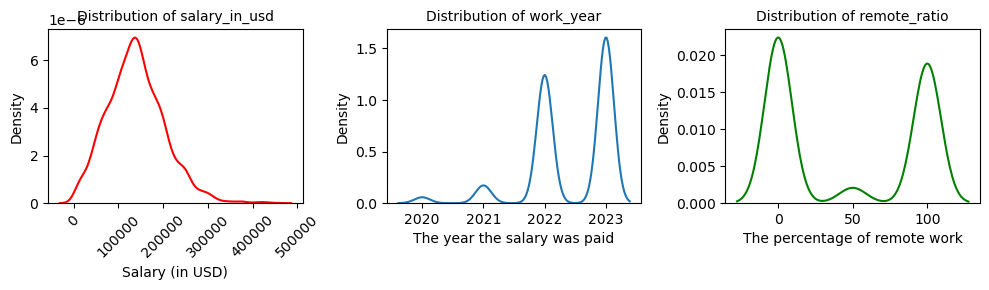

In [12]:
#We will use Kernel density plots, Histograms, and Violin plots for numeric data:

#The Kernal Density Plots are as follows:
fig, axs = plt.subplots(ncols=3, figsize=(10, 3))

#Kernel density plot for salary_in_usd column
sns.kdeplot(data=salaries_data_usd['salary_in_usd'], ax=axs[0], color='red')
axs[0].set_title('Distribution of salary_in_usd', fontsize=10)
axs[0].set_xlabel('Salary (in USD)')
axs[0].tick_params(axis='x', rotation=45)

#Kernel density plot for work_year column
sns.kdeplot(data=salaries_data_usd['work_year'], ax=axs[1])
axs[1].set_title('Distribution of work_year', fontsize=10)
axs[1].set_xlabel('The year the salary was paid')

#Kernel density plot for remote_ratio column
sns.kdeplot(data=salaries_data_usd['remote_ratio'], ax=axs[2], color='green')
axs[2].set_title('Distribution of remote_ratio', fontsize=10)
axs[2].set_xlabel('The percentage of remote work')

plt.tight_layout()
plt.show()

#### Kernal Density Plot Analysis

* The 'salary_in_usd plot shows that most of the salaries are concentrated in the range of 100,000 USD per annum to 200,000 usd per annum. From the describe function earier we also saw that the maximum value in this feature is 450,000 USD per annum,
* The 'work_year' density plot shows that most of the values in the dataset are concentrated in 2022 ans 2023, which means that the data for 2020 and 2021 will not be very representative and we may have to provide weights to them if we want to include in the further analysis,
* The 'remote_ratio' plot clarifies that most of the companies have either no remote capabilites or are mostly remote. There is a very small praction of companies which have a hybrid model. 

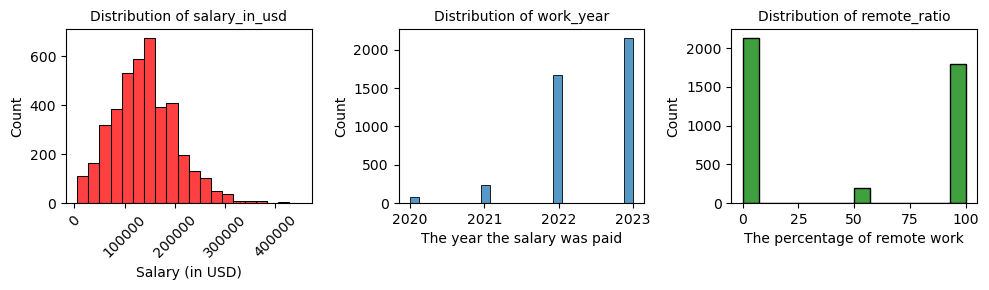

In [13]:
#The Histograms of the three numerical features are as follows:
fig, axs = plt.subplots(ncols=3, figsize=(10, 3))

#Histogram for salary_in_usd column
sns.histplot(data=salaries_data_usd['salary_in_usd'], bins=20, ax=axs[0], color='red')
#we have added 20 bins for the salary histogram,
axs[0].set_title('Distribution of salary_in_usd', fontsize=10)
axs[0].set_xlabel('Salary (in USD)')
axs[0].tick_params(axis='x', rotation=45)

#Histogram for work_year column
sns.histplot(data=salaries_data_usd['work_year'], ax=axs[1])
axs[1].set_title('Distribution of work_year', fontsize=10)
axs[1].set_xlabel('The year the salary was paid')

#Histogram for remote_ratio column
sns.histplot(data=salaries_data_usd['remote_ratio'], ax=axs[2], color='green')
axs[2].set_title('Distribution of remote_ratio', fontsize=10)
axs[2].set_xlabel('The percentage of remote work')

plt.tight_layout()
plt.show()

#### Histogram Analysis
* The 'Salary_in_usd' histogram is very interesting. For better analysis, we have divided the salaries into 20 bins. The min value (from describe function) is 5132 USD per annum and max value is 450,000 USED per annum. lets say the range of this feature is 5000 to 450,000. In that case, each bin has a range of (450,000-5000)/20 = 22,250 USD per annum. The highest frequency is in the 7th bin which is roughly between 100,000 and 200,000. Meaning that the average saalry of this dataset is 150,000 USD per annum,
* The 'work_year' histogram confirms the same analysis is before that most values are from 2022 and 2023,
* The histogram of 'remote_ratio' is the same too. 

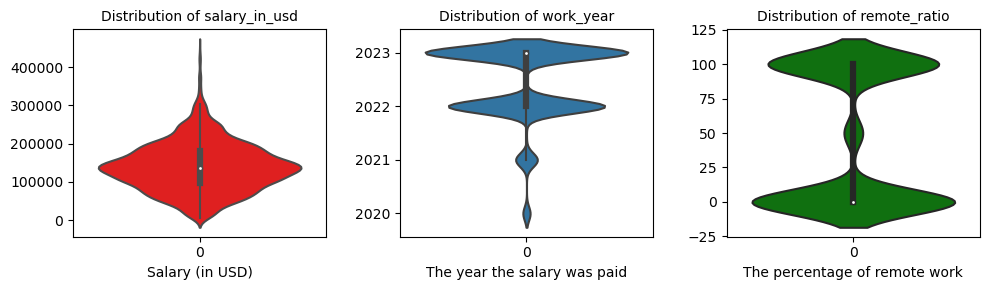

In [14]:
#Violin Plots for the three numerical features are as follows:
fig, axs = plt.subplots(ncols=3, figsize=(10, 3))

#Violin plot for salary_in_usd column
sns.violinplot(data=salaries_data_usd['salary_in_usd'], ax=axs[0], color='red')
axs[0].set_title('Distribution of salary_in_usd', fontsize=10)
axs[0].set_xlabel('Salary (in USD)')

#Violin plot for work_year column
sns.violinplot(data=salaries_data_usd['work_year'], ax=axs[1])
axs[1].set_title('Distribution of work_year', fontsize=10)
axs[1].set_xlabel('The year the salary was paid')

#Violin plot for remote_ratio column
sns.violinplot(data=salaries_data_usd['remote_ratio'], ax=axs[2], color='green')
axs[2].set_title('Distribution of remote_ratio', fontsize=10)
axs[2].set_xlabel('The percentage of remote work')

plt.tight_layout()
plt.show()

#The analysis of the violin plots are also the same as above. We have shown the same univariate analysis by using three mothods.

##### Univariate Analysis (Categorical data)

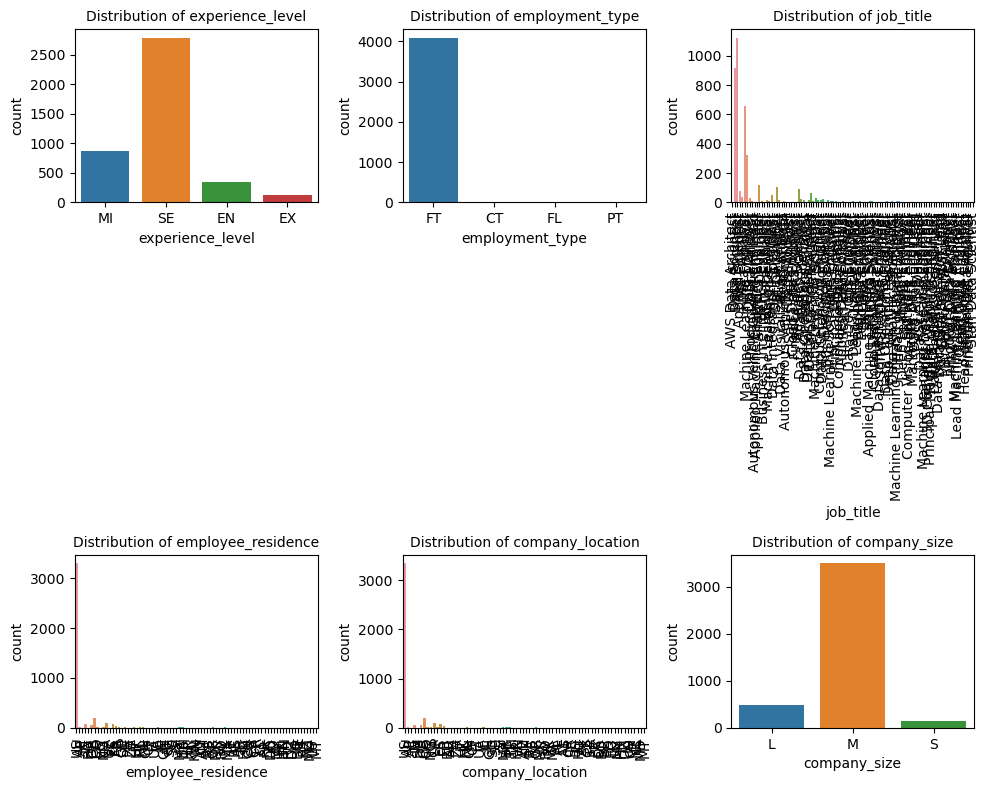

In [15]:
#For univariate analysis of the 6 categorical variables/ features we have, we can use bar charts 
#and specifically count plots to count the different instances:

#Setting the figure size
plt.figure(figsize=(10,8))

#Creating subplots for each categorical variable, 
#Also, this time we are using the subplot function to create a grid of plots.
plt.subplot(231)
sns.countplot(data=salaries_data_usd, x='experience_level')
plt.title('Distribution of experience_level', fontsize=10)

plt.subplot(232)
sns.countplot(data=salaries_data_usd, x='employment_type')
plt.title('Distribution of employment_type', fontsize=10)

plt.subplot(233)
sns.countplot(data=salaries_data_usd, x='job_title')
plt.xticks(rotation=90)
plt.title('Distribution of job_title', fontsize=10)

plt.subplot(234)
sns.countplot(data=salaries_data_usd, x='employee_residence')
plt.xticks(rotation=90)
plt.title('Distribution of employee_residence', fontsize=10)

plt.subplot(235)
sns.countplot(data=salaries_data_usd, x='company_location')
plt.xticks(rotation=90)
plt.title('Distribution of company_location', fontsize=10)

plt.subplot(236)
sns.countplot(data=salaries_data_usd, x='company_size')
plt.title('Distribution of company_size', fontsize=10)

plt.tight_layout()
plt.show()

#### Count Plot Analysis
* Now these univariate analysis are very interesting. We can see that the count plots of 'job_title', 'employee_residence', and 'company_location' are not very helpful at all becuase they have a very large number og unique instances. Therefore, it is better to only focus on the top 5 from each category instead of all the instances. We will drop these plots for now and focus on the other three,
* The experience_level feature has four unique values which are; EN: Entry-level, MI: Junior Mid-level, SE: Intermediate Senior-level, and EX: Expert Executive-level / Director. From the plot we can see that most records are of SE i.e. more than 2500.
* The employment_type feature has also four unique values which are; PT: Part-time, FT: Full-time, CT: Contract, and FL: Freelance. However, from the plot, it is interesting to know that most values are in FT category i.e. more than 4000. Interesting, our dataset has a total of 4134 records,
* The company_size has three unique values which are; S: less than 50 employees (small), M: 50 to 250 employees (medium), and L: more than 250 employees (large). From the plot we can see that most of the 

In [16]:
#We could have also used: 
# #Setting up the figure
# fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

# #Plotting bar chart for experience_level column
# sns.countplot(data=salaries_data_usd, x='experience_level', ax=axs[0][0])
# axs[0][0].set_title('Distribution of Experience Levels')
# axs[0][0].set_xlabel('Experience Level')
# axs[0][0].set_ylabel('Count')

# #Plotting bar chart for employment_type column
# sns.countplot(data=salaries_data_usd, x='employment_type', ax=axs[0][1])
# axs[0][1].set_title('Distribution of Employment Types')
# axs[0][1].set_xlabel('Employment Type')
# axs[0][1].set_ylabel('Count')

# #Plotting bar chart for job_title column
# sns.countplot(data=salaries_data_usd, y='job_title', ax=axs[0][2])
# axs[0][2].set_title('Distribution of Job Titles')
# axs[0][2].set_xlabel('Count')
# axs[0][2].set_ylabel('Job Title')

# #Plotting bar chart for employee_residence column
# sns.countplot(data=salaries_data_usd, x='employee_residence', ax=axs[1][0])
# axs[1][0].set_title('Distribution of Employee Residences')
# axs[1][0].set_xlabel('Employee Residence')
# axs[1][0].set_ylabel('Count')

# #Plotting bar chart for company_location column
# sns.countplot(data=salaries_data_usd, x='company_location', ax=axs[1][1])
# axs[1][1].set_title('Distribution of Company Locations')
# axs[1][1].set_xlabel('Company Location')
# axs[1][1].set_ylabel('Count')

# #Plotting bar chart for company_size column
# sns.countplot(data=salaries_data_usd, x='company_size', ax=axs[1][2])
# axs[1][2].set_title('Distribution of Company Sizes')
# axs[1][2].set_xlabel('Company Size')
# axs[1][2].set_ylabel('Count')

# plt.tight_layout()
# plt.show()

#### Analysis of employment_type feature

Previously we analyzed through the count plot that the employment_type feature has four unique values which are; PT: Part-time, FT: Full-time, CT: Contract, and FL: Freelance. However, from the plot, it was interesting to see that most values are in FT category i.e. more than 4000. Interesting, our dataset has a total of 4134 records,
We will now further investigate the issue.

In [17]:
salaries_data_usd.shape

(4134, 9)

In [18]:
useful_counts_et = salaries_data_usd['employment_type'].value_counts()
useful_counts_et
#It shows that out of total records of 4134, 4093 are in the category FT: Full-time and only 41 values are in the other three. 
#It means this dataset is not very representative for the other three categories in this feature.

FT    4093
PT      17
CT      13
FL      11
Name: employment_type, dtype: int64

#### Analysis of the employee_residence feature

In [19]:
#Using the saalries_data_usd dataframe:
from collections import Counter
print('Total No. of occurances in employee_residence: ', salaries_data_usd['employee_residence'].nunique())
print('After looking at the output, we can see that out of 80 unique values in this feature, 30 has only one occurance. Also, the highest occurance is in US i.e. 3304 and next highest in Great Britian is only 198. It means that most of the employees who took part in this dataset are from United States of America')
employee_residence_count = dict(Counter(salaries_data_usd['employee_residence']))
employee_residence_count = {k: v for k, v in sorted(employee_residence_count.items(), key=lambda item: item[1], reverse=True)}
employee_residence_count

Total No. of occurances in employee_residence:  80
After looking at the output, we can see that out of 80 unique values in this feature, 30 has only one occurance. Also, the highest occurance is in US i.e. 3304 and next highest in Great Britian is only 198. It means that most of the employees who took part in this dataset are from United States of America


{'US': 3306,
 'GB': 199,
 'CA': 94,
 'ES': 86,
 'IN': 71,
 'DE': 52,
 'FR': 42,
 'PT': 18,
 'BR': 18,
 'GR': 16,
 'NL': 15,
 'AU': 13,
 'NG': 10,
 'IT': 10,
 'MX': 10,
 'AR': 9,
 'CO': 8,
 'JP': 8,
 'PK': 8,
 'IE': 7,
 'AT': 6,
 'PL': 6,
 'SG': 5,
 'BE': 5,
 'TR': 5,
 'PR': 5,
 'AE': 4,
 'BO': 4,
 'CH': 4,
 'UA': 4,
 'SI': 4,
 'LV': 4,
 'RU': 4,
 'UZ': 3,
 'PH': 3,
 'TH': 3,
 'HR': 3,
 'VN': 3,
 'RO': 3,
 'HU': 3,
 'DK': 3,
 'EG': 2,
 'HK': 2,
 'CF': 2,
 'FI': 2,
 'GH': 2,
 'SE': 2,
 'KE': 2,
 'LT': 2,
 'AS': 2,
 'CZ': 2,
 'CL': 2,
 'GE': 1,
 'ZA': 1,
 'IL': 1,
 'KW': 1,
 'CY': 1,
 'AM': 1,
 'BA': 1,
 'MK': 1,
 'MA': 1,
 'IR': 1,
 'SK': 1,
 'CN': 1,
 'CR': 1,
 'DO': 1,
 'ID': 1,
 'MY': 1,
 'EE': 1,
 'HN': 1,
 'TN': 1,
 'DZ': 1,
 'IQ': 1,
 'BG': 1,
 'JE': 1,
 'RS': 1,
 'NZ': 1,
 'MD': 1,
 'LU': 1,
 'MT': 1}

By using the ISO 3166 country code, the following 20 countries top the list:
'US': United States,
'GB': United Kingdom,
'CA': Canada,
'ES': Spain,
'IN': India,
'DE': Germany,
'FR': France,
'PT': Portugal,
'BR': Brazil,
'GR': Greece,
'NL': Netherlands,
'AU': Australia,
'NG': Nigeria,
'MX': Mexico,
'AR': Argentina,
'IT': Italy,
'CO': Colombia,
'JP': Japan,
'PK': Pakistan,
'IE': Ireland, 
Therefore, we will only use these countries and remove all data points from salaries_usd_filtered dataset. We will still keep it in the salaries_data_usd dataset for now. 

In [20]:
desired_employee_residence = [ 'US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR', 'PT', 'BR', 'GR', 'NL', 
                             'AU', 'NG', 'MX', 'AR', 'IT', 'CO', 'JP', 'PK', 'IE']
salaries_usd_filtered = salaries_data_usd[salaries_data_usd['employee_residence'].isin(desired_employee_residence)]
print(salaries_usd_filtered['employee_residence'].unique())
print('Rows and Columns of the salaries_usd_filtered dataframe now: ', salaries_usd_filtered.shape)
print('4134-4000 = 134 records have been dropped from the dataframe, creating a new dataframe called salaries_usd_filtered.')

['US' 'AU' 'IN' 'DE' 'GB' 'CO' 'NG' 'CA' 'ES' 'FR' 'AR' 'JP' 'IT' 'PT'
 'NL' 'IE' 'MX' 'BR' 'GR' 'PK']
Rows and Columns of the salaries_usd_filtered dataframe now:  (4000, 9)
4134-4000 = 134 records have been dropped from the dataframe, creating a new dataframe called salaries_usd_filtered.


#### Analysis of company_location feature

In [21]:
# #Using the saalries_data_usd dataframe:
print('Total No. of occurances in company_location: ', salaries_data_usd['company_location'].nunique())
#print('After looking at the output, we can see that out of 73 unique values in this feature, 30 has only one occurance. The first 20 highest occuraning instancies in this feature are exactly the same as of employee_residence.)
company_location_count = dict(Counter(salaries_data_usd['company_location']))
company_location_count = {k: v for k, v in sorted(employee_residence_count.items(), key=lambda item: item[1], reverse=True)}
company_location_count

Total No. of occurances in company_location:  74


{'US': 3306,
 'GB': 199,
 'CA': 94,
 'ES': 86,
 'IN': 71,
 'DE': 52,
 'FR': 42,
 'PT': 18,
 'BR': 18,
 'GR': 16,
 'NL': 15,
 'AU': 13,
 'NG': 10,
 'IT': 10,
 'MX': 10,
 'AR': 9,
 'CO': 8,
 'JP': 8,
 'PK': 8,
 'IE': 7,
 'AT': 6,
 'PL': 6,
 'SG': 5,
 'BE': 5,
 'TR': 5,
 'PR': 5,
 'AE': 4,
 'BO': 4,
 'CH': 4,
 'UA': 4,
 'SI': 4,
 'LV': 4,
 'RU': 4,
 'UZ': 3,
 'PH': 3,
 'TH': 3,
 'HR': 3,
 'VN': 3,
 'RO': 3,
 'HU': 3,
 'DK': 3,
 'EG': 2,
 'HK': 2,
 'CF': 2,
 'FI': 2,
 'GH': 2,
 'SE': 2,
 'KE': 2,
 'LT': 2,
 'AS': 2,
 'CZ': 2,
 'CL': 2,
 'GE': 1,
 'ZA': 1,
 'IL': 1,
 'KW': 1,
 'CY': 1,
 'AM': 1,
 'BA': 1,
 'MK': 1,
 'MA': 1,
 'IR': 1,
 'SK': 1,
 'CN': 1,
 'CR': 1,
 'DO': 1,
 'ID': 1,
 'MY': 1,
 'EE': 1,
 'HN': 1,
 'TN': 1,
 'DZ': 1,
 'IQ': 1,
 'BG': 1,
 'JE': 1,
 'RS': 1,
 'NZ': 1,
 'MD': 1,
 'LU': 1,
 'MT': 1}

In [22]:
#As we have already filtered the salaries_usd_filtered dataset according to 20 best employee_residences, 
#lets check the unique occurances of company_location in the said dataset:
print(salaries_usd_filtered['company_location'].unique())
print('Total No. of occurances in company_location: ', salaries_usd_filtered['company_location'].nunique())
#As there are 33 instead of 20 selected occurances, we will match these two columns with only 
#the top 20 countries as selected previously.

['US' 'AU' 'IN' 'DE' 'GB' 'CO' 'NG' 'CA' 'JP' 'ES' 'FR' 'AR' 'IT' 'NL'
 'FI' 'IE' 'MX' 'BR' 'PT' 'GR' 'SG' 'PK' 'AL' 'CR' 'AS' 'ID' 'LU' 'MY'
 'RO' 'PL' 'DK' 'AT' 'CH']
Total No. of occurances in company_location:  33


In [23]:
desired_company_location = [ 'US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR', 'PT', 'BR', 'GR', 'NL', 
                             'AU', 'NG', 'MX', 'AR', 'IT', 'CO', 'JP', 'PK', 'IE']
salaries_usd_filtered = salaries_usd_filtered[salaries_usd_filtered['company_location'].isin(desired_company_location)]
print(salaries_usd_filtered['company_location'].unique())
print('Rows and Columns of the salaries_usd_filtered dataframe now: ', salaries_usd_filtered.shape)
print('Further 4000-3984 = 16 records have been dropped from the filtered dataframe.')

['US' 'AU' 'IN' 'DE' 'GB' 'CO' 'NG' 'CA' 'JP' 'ES' 'FR' 'AR' 'IT' 'NL'
 'IE' 'MX' 'BR' 'PT' 'GR' 'PK']
Rows and Columns of the salaries_usd_filtered dataframe now:  (3984, 9)
Further 4000-3984 = 16 records have been dropped from the filtered dataframe.


#### Final Univariate Analysis (Categorical features)

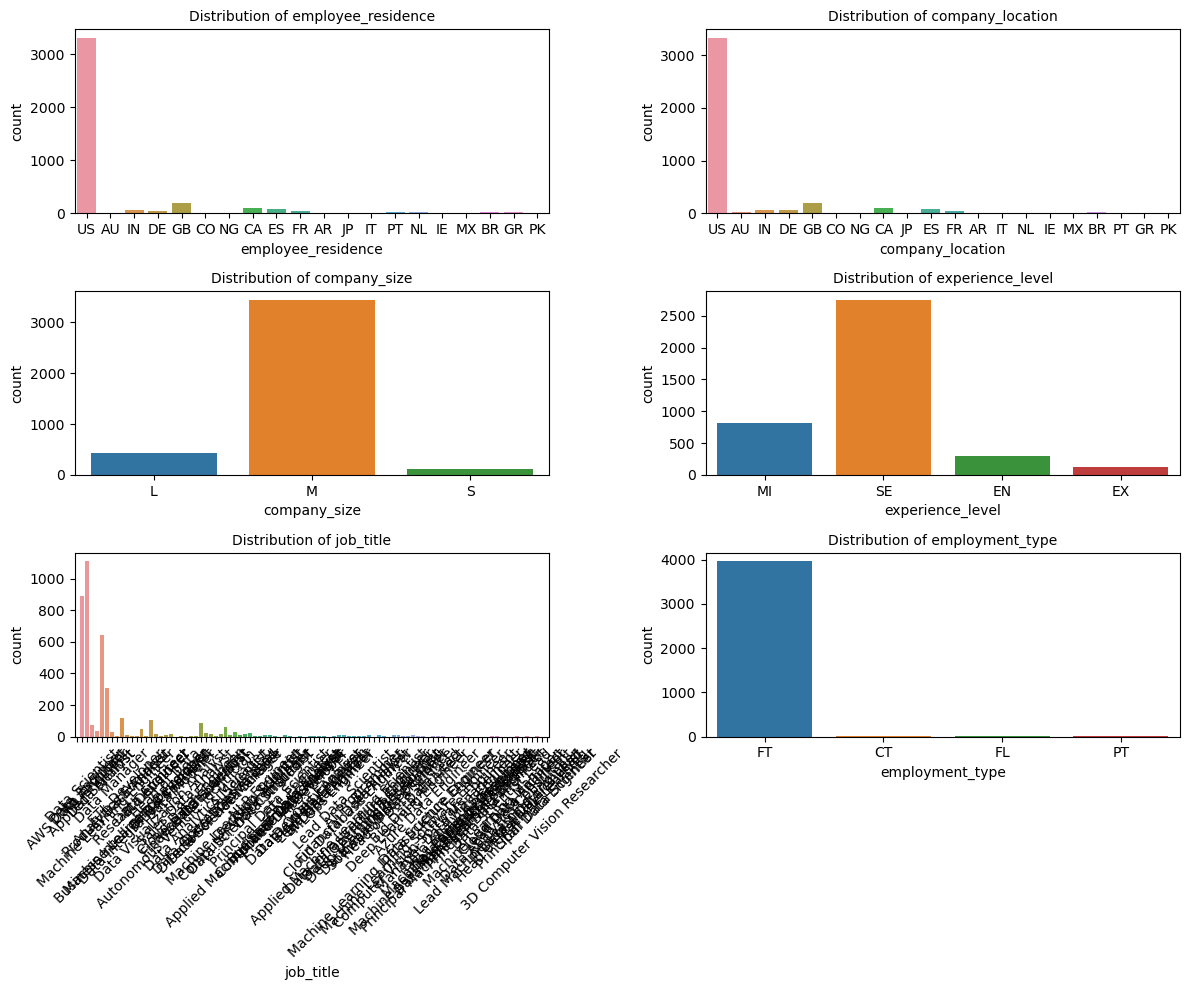

In [24]:
#Now generating the count plots of all the categorical features again for prespective:
#Setting the figure size
plt.figure(figsize=(12,10))

#Creating subplots for each categorical variable, 
#Also, this time we are using the subplot function to create a grid of plots.
plt.subplot(324)
sns.countplot(data=salaries_usd_filtered, x='experience_level')
plt.title('Distribution of experience_level', fontsize=10)

plt.subplot(325)
sns.countplot(data=salaries_usd_filtered, x='job_title')
plt.xticks(rotation=45)
plt.title('Distribution of job_title', fontsize=10)

plt.subplot(321)
sns.countplot(data=salaries_usd_filtered, x='employee_residence')
plt.title('Distribution of employee_residence', fontsize=10)

plt.subplot(322)
sns.countplot(data=salaries_usd_filtered, x='company_location')
plt.title('Distribution of company_location', fontsize=10)

plt.subplot(323)
sns.countplot(data=salaries_usd_filtered, x='company_size')
plt.title('Distribution of company_size', fontsize=10)

plt.subplot(326)
sns.countplot(data=salaries_usd_filtered, x='employment_type')
plt.title('Distribution of employment_type', fontsize=10)

plt.tight_layout()
plt.show()

#The analysis is much more crisper and better for almost all the categorical features except 'job_title'. 
#We are keeping it like that to do hierarchical clustering on the 99 unique values later in the profolio. 

### Bivariate Analysis of the features

Bivariate analysis is a statistical analysis method that involves analyzing the relationship between two variables. It is concerned with studying the behavior and interaction of two variables simultaneously to understand the relationship between them. Bivariate analysis is typically used to explore the association between two variables and to identify patterns, trends, or correlations between them. The analysis can be used to determine the strength, direction, and form of the relationship between two variables, and it can also be used to develop models to predict one variable based on the values of the other variable. Bivariate analysis is a fundamental component of data analysis and is often used as a starting point for more complex multivariate analysis. Following are some ways in which a bivariate analysis may be done.
* Correlation analysis: A statistical technique that measures the strength and direction of the relationship between two continuous variables.
* Heatmaps: Heatmaps can show the relationship between two categorical variables by displaying the frequency or proportions in a tabular form using color intensities.
* Clustered Bar Charts: Clustered bar charts are used to compare the frequency or proportions of different categories in two or more categorical variables.
* Hexbin Plots: Hexbin plots are useful for visualizing the density of points in a scatter plot when there are a large number of overlapping points.
* Violin Plots with Hue: Violin plots can be enhanced by adding a hue parameter to depict the distribution of a numeric variable across different categories
* Scatter plot: A graphical representation of the relationship between two continuous variables, where each point represents a single observation.
* Line chart: A chart that shows the relationship between two continuous variables over time or a range of values.
* Regression analysis: A statistical technique used to model and analyze the relationship between two or more variables. It involves fitting a linear or non-linear equation to the data to predict the value of the dependent variable based on the values of the independent variables.
* Contingency table analysis: A statistical technique used to analyze the relationship between two categorical variables by creating a table that shows the frequency of each combination of the variables.
* Box plot: A graphical representation of the distribution of a continuous variable that shows the median, quartiles, and outliers.
* Bubble chart: A type of chart that displays three dimensions of data by representing each data point with a circle, where the x-axis represents one variable, the y-axis represents another variable, and the size of the circle represents a third variable.

### Moving to Bivariate Analysis and Data Preprocessing

* Through univariate analysis, we have come to the conclusion that there is only one feature i.e. salary_in_usd which is a continous numerical variable. All other variables/ features can we considered as categorical variables. Hence, all categorical variables are the independent variables and only the numerical variable is the dependent variable. 
* Further analysis has shown that as all our data has categorical variables, we will do logistic regression on our data. Before that, we have to convert the categorical variables into ordinal, binary, or numeric variables to be included in the correlation between the different categorical features,
* Also, as both the company_location and employee_residence features seems almost identical after seeing their count plots, we may be dropping one of the feature entirely to make our analysis more strong,
* Finally, as salary_in_usd will now considered a label class for logistic regression, we need to convert it into ranges rather than numerical values to that the supervised learning of the data can be done more efficently. 

In [25]:
salaries_usd_filtered.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

#### Adding a new column of salary_label using salary_in_usd feature
We are now dividing the saalries into four basic categories and producing a new salary_lable feature as a label for supervised learning. 

| Category | Range (USD/Year) | label value |
| -------- | --------- | ------------- |
| Low | from 0 to 80,000 both numbers included in this bin | 0 |
| Lower Middle | from 80,000 to 150,000 only the 2nd number included in the bin as the first one is in 0 label | 1 |
| Upper Middle | from 150,000 to 200,000, only  the 2nd number included in the bin as the first one is in 1 label | 2 |
| High | from 200,000 to the highest value, only the 2nd number included in the bin as the first one is in 2 label | 3 |

In [26]:
#Defining the bins and corresponding labels
bins = [0, 80000, 150000, 200000, float('inf')]
labels = [0, 1, 2, 3]

#Using pd.cut() to create a new column 'salary_label'
salaries_usd_filtered['salary_label'] = pd.cut(salaries_usd_filtered['salary_in_usd'], bins=bins, labels=labels)

#Converting the label values to integers
salaries_usd_filtered['salary_label'] = salaries_usd_filtered['salary_label'].astype(int)

#Viewing the new dataframe
salaries_usd_filtered.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_label
0,2023,MI,FT,AWS Data Architect,258000,US,100,US,L,3
1,2023,SE,FT,Data Scientist,225000,US,0,US,M,3
2,2023,SE,FT,Data Scientist,156400,US,0,US,M,2


#### Converting experience_level feature into a numerical variable
To use correlation function, we need to convert the categorical features into numeric one for better analysis. Therefore, we will now convert the categorical variables especially the one which have an order (ordinal) into numerical variables.

The feature in the salaries_usd_filtered called experience_level has four unique values. I want to convert these categorical values into numeric ones so they can be used in logistic regression. As they are levels so they can be converted into ordinal variable as follows:


| Category | Full Form | Numeric Value |
| -------- | --------- | ------------- |
| EN       | Entry-level | 0             |
| MI       | Junior Mid-level | 1         |
| SE       | Intermediate Senior-level | 2 |
| EX       | Expert Executive-level / Director | 3 |

In [27]:
#Therefore, we will replace the values as below using the replace fucntion: 
#We could also use OrdinalEncoder method to transform the categorical values to numerical values too.
salaries_usd_filtered['experience_level'] = salaries_usd_filtered['experience_level'].replace({'EN': 0, 'MI': 1, 
                                                                                               'SE': 2, 'EX': 3})
salaries_usd_filtered.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_label
0,2023,1,FT,AWS Data Architect,258000,US,100,US,L,3
1,2023,2,FT,Data Scientist,225000,US,0,US,M,3
2,2023,2,FT,Data Scientist,156400,US,0,US,M,2


#### Converting company_size feature into numerical variable
We will now convert the said column feature as follows becuase it also has levels in it:

| Category | Full Form | Numeric Value |
| -------- | --------- | ------------- |
| S       | Less than 50 employees (small) | 0 |
| M       | 50 to 250 employees (medium) | 1   |
| L       | More than 250 employees (Large) | 2 |

In [28]:
salaries_usd_filtered['company_size'] = salaries_usd_filtered['company_size'].replace({'S': 0, 'M': 1, 
                                                                                               'L': 2})
salaries_usd_filtered.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_label
0,2023,1,FT,AWS Data Architect,258000,US,100,US,2,3
1,2023,2,FT,Data Scientist,225000,US,0,US,1,3
2,2023,2,FT,Data Scientist,156400,US,0,US,1,2


#### Converting the percentages in remote_ratio column to ratios
The three unique values in this column feature are 0, 50, and 100. They are percentages and it is better to convert them into ratios as follows: 

|Full Form (Percentage) | Numeric Value (ratio)|
| --------- | ------------- |
| 0 | 0 |
| 50  | 0.5   |
| 100 | 1 |

In [29]:
salaries_usd_filtered['remote_ratio'] = salaries_usd_filtered['remote_ratio'].replace({50:0.5, 
                                                                                               100: 1})
salaries_usd_filtered.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_label
0,2023,1,FT,AWS Data Architect,258000,US,1.0,US,2,3
1,2023,2,FT,Data Scientist,225000,US,0.0,US,1,3
2,2023,2,FT,Data Scientist,156400,US,0.0,US,1,2


#### Dropping irrelevant feature columns from the dataset

* At this point we are dropping the employment_residence because the company_location feature is almost identical to it. 
* Furthermore, as most of the records belong to FT: Full-Time in employment_type, we are also dropping this column.

In [30]:
salaries_usd_filtered['employment_type'].value_counts()

FT    3956
CT      11
PT      11
FL       6
Name: employment_type, dtype: int64

In [31]:
# droping columns from the copy:
salaries_usd_filtered_dc = salaries_usd_filtered.drop(['employee_residence', 'employment_type'], axis=1)

salaries_usd_filtered_dc.head(3)
# the original dataframe 'salaries_usd_filtered' is not modified

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,salary_label
0,2023,1,AWS Data Architect,258000,1.0,US,2,3
1,2023,2,Data Scientist,225000,0.0,US,1,3
2,2023,2,Data Scientist,156400,0.0,US,1,2


In [32]:
#getting the index of the 'salary_label' column
idx = salaries_usd_filtered_dc.columns.get_loc('salary_label')

# moving the 'salary_label' column to the first position (index 0)
salaries_usd_filtered_dc = salaries_usd_filtered_dc.iloc[:, [idx] + list(range(len(salaries_usd_filtered_dc.columns)-1))]
salaries_usd_filtered_dc.head(3)

,salary_label,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,3,2023,1,AWS Data Architect,258000,1.0,US,2
1,3,2023,2,Data Scientist,225000,0.0,US,1
2,2,2023,2,Data Scientist,156400,0.0,US,1


#### Correlation as bivariate analysis
Now that we have converted most of the features into numeric variables, we can perform correlation analysis as the first step towards bivariate analysis.

In [33]:
corr_matrix = salaries_usd_filtered_dc.corr()
corr_matrix

,salary_label,work_year,experience_level,salary_in_usd,remote_ratio,company_size
salary_label,1.000000,0.204728,0.393756,0.926465,-0.048293,-0.004413
work_year,0.204728,1.000000,0.180935,0.213448,-0.223740,-0.166644
experience_level,0.393756,0.180935,1.000000,0.416582,-0.028304,-0.069371
salary_in_usd,0.926465,0.213448,0.416582,1.000000,-0.055940,-0.007150
remote_ratio,-0.048293,-0.223740,-0.028304,-0.055940,1.000000,0.031452
company_size,-0.004413,-0.166644,-0.069371,-0.007150,0.031452,1.000000


#### Making a heatmap to better visualize the correlation

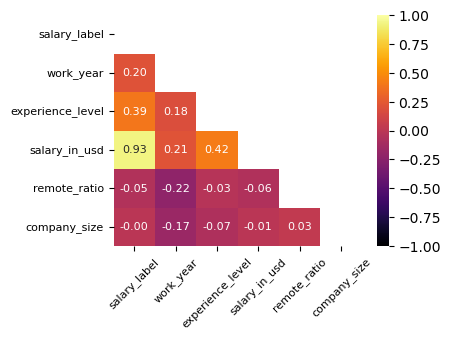

In [34]:
plt.figure(figsize=(4,3))

# creating a mask for the upper triangle as the values are symetrical along the diagonal:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#Now we generate the heatmap of the correlation matrix: 
sns.heatmap(corr_matrix, vmin=-1, vmax=1, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 8}, cmap='inferno') 
#Different types of cmap: sns.cubehelix_palette(as_cmap=True), magma, inferno, viridis, cividis, RdBu, BuGn etc.

# Changing font size of x and y labels
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
# show the plot
plt.show()

#### Heatmap analysis
* The most strongest positive correlation is between salary_label and experience_level. This is intuitively correct as well because, as the experience increases, salary also increases,
* There is a negative correlation between work_year with remote_ratio. As the data is from 2020 to 2023, the peak years of covid-19 pandemic, this trend of negative correlation suggests that as the years progressed, the companies preferred remote working, 
* Also, there is a negative correlation between work_year and company_size, again due to covid-19 pandemic, compnaies shrunk in size and moved towards remote working.

#### Making Clustered Bar Charts for categorical variables
We can make different combinations of clustered bar charts but some of the examples are below.

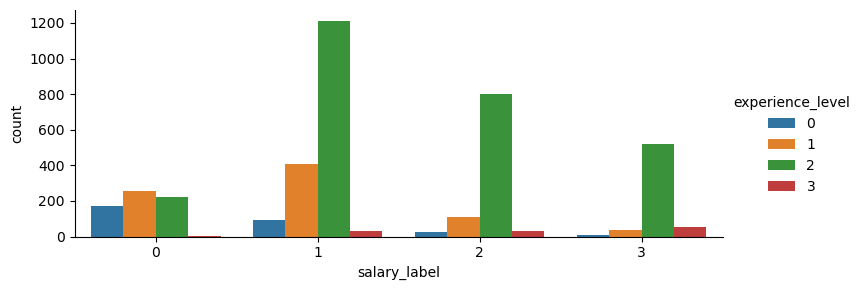

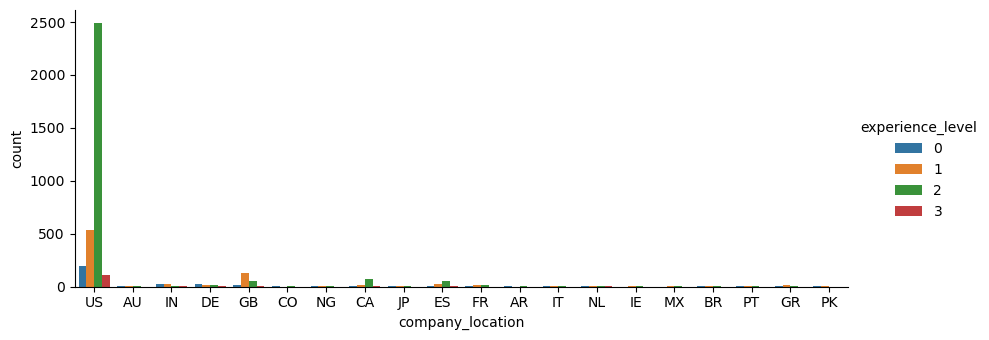

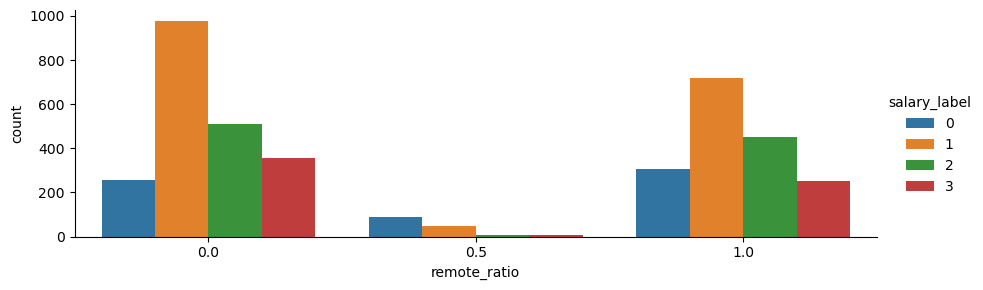

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# create clustered bar chart for job_title and work_year variables
sns.catplot(x="salary_label", hue="experience_level", data=salaries_usd_filtered, kind="count", height=3, aspect=2.5)

# create clustered bar chart for company_location and experience_level variables
sns.catplot(x="company_location", hue="experience_level", data=salaries_usd_filtered, kind="count", height=3.5, aspect=2.5)

# create clustered bar chart for remote_ratio and salary_label variables
sns.catplot(x="remote_ratio", hue="salary_label", data=salaries_usd_filtered, kind="count", height=3, aspect=3)

# show the plots
plt.show()

#### Clustered Bar Chart Analysis
* From the first chart, it can be seen clearly that most of the people who took part in this dataset over the years have increased in the third category of salary which is from 150,000 to 200,000 USD,
* Second chart shows that in US, most jobs are found in the 3rd category of experience_level which is Intermediate Senior-level. We can further do the analysis by removing US and focusing on the other countries, however, that is not the scope of this exercise,
* Third chart shows a similar trend between of salary label between the fully remote and on-site companies. 

#### Fixing the job_title feature column

In [36]:
print('Total number of unique instances in job_title: ', salaries_usd_filtered_dc['job_title'].nunique())
#print(salaries_usd_filtered_dc['job_title'].unique())

Total number of unique instances in job_title:  96


In [37]:
#set(salaries_data_usd['job_title'].to_list())

In [38]:
salaries_usd_filtered_dc.head(2)

,salary_label,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,3,2023,1,AWS Data Architect,258000,1.0,US,2
1,3,2023,2,Data Scientist,225000,0.0,US,1


In [39]:
from collections import Counter
job_titles_count = dict(Counter(salaries_usd_filtered_dc['job_title']))
#This code is to alphabatically arrange the keys:
job_titles_count = {k: v for k, v in sorted(job_titles_count.items(), key=lambda item: item[0])}
job_titles_count

{'3D Computer Vision Researcher': 1,
 'AI Developer': 4,
 'AI Programmer': 2,
 'AI Scientist': 13,
 'AWS Data Architect': 1,
 'Analytics Engineer': 117,
 'Applied Data Scientist': 7,
 'Applied Machine Learning Engineer': 3,
 'Applied Machine Learning Scientist': 8,
 'Applied Scientist': 77,
 'Autonomous Vehicle Technician': 1,
 'Azure Data Engineer': 1,
 'BI Analyst': 9,
 'BI Data Analyst': 14,
 'BI Data Engineer': 1,
 'BI Developer': 16,
 'Big Data Architect': 2,
 'Big Data Engineer': 6,
 'Business Data Analyst': 13,
 'Business Intelligence Engineer': 6,
 'Cloud Data Architect': 1,
 'Cloud Data Engineer': 2,
 'Cloud Database Engineer': 5,
 'Compliance Data Analyst': 1,
 'Computer Vision Engineer': 17,
 'Computer Vision Software Engineer': 4,
 'Data Analyst': 644,
 'Data Analytics Consultant': 1,
 'Data Analytics Engineer': 5,
 'Data Analytics Lead': 1,
 'Data Analytics Manager': 24,
 'Data Analytics Specialist': 2,
 'Data Architect': 105,
 'Data DevOps Engineer': 1,
 'Data Engineer': 

##### Findings of job_title feature
* There are numerous job categories listed here (99 categories),
* There are numerous job titles that can be grouped into one field:
    - For example: Financial Data Analyst, Product Data Analyst, Business Data Analyst, ... can be collectively called Data Analyst.
    - For example: Cloud Data Architect, Principal Data Architect, Big Data Architect',... can be collectively called Data Architect.
* Some jobs even appear in both categories of names (this can be considered a duplication):
    - For example: Machine Learning Engineer and ML Engineer are both understood as Machine Learning Engineer.
    - For example: Financial Data Analyst and Finance Data Analyst.
* Solution: For the purposes of data discovery and analysis, we will divide the job titles into the appropriate generalization buckets. Here the group has classified and divided into the following main groups:

    - Data Scientist
    - Data Engineer
    - Data Analyst
    - Data Architect
    - Data Manager
    - Machine Learning Engineer
    - Machine Learning Scientist
    - Computer Vision Engineer
    - NLP Engineer
    - Research Scientist
    - AI Scientist
    - Applied Scientist
    - Undefined Category (Any instance which has an occurance of 1 or 2 and cannot be sorted into another category)

In [40]:
#mapping the new classification type
employment_classification = {'3D Computer Vision Researcher': 'Computer Vision Engineer','AI Developer':'AI Scientist',
                             'AI Programmer': 'AI Scientist','AI Scientist': 'AI Scientist','AWS Data Architect':'Data Architect',
                             'Analytics Engineer':'Data Analyst','Applied Data Scientist':'Data Scientist',
                             'Applied Machine Learning Engineer':'Machine Learning Engineer',
                             'Applied Machine Learning Scientist':'Machine Learning Scientist',
                             'Applied Scientist':'Applied Scientist','Autonomous Vehicle Operations Lead':'Undefined Category',
                             'Autonomous Vehicle Technician':'Undefined Category','Azure Data Engineer':'Data Engineer',
                             'BI Analyst':'Data Analyst','BI Data Analyst':'Data Analyst','BI Data Engineer':'Data Engineer',
                             'BI Developer':'Data Architect','Big Data Architect':'Data Architect',
                             'Big Data Engineer':'Data Engineer','Business Data Analyst':'Data Analyst',
                             'Business Intelligence Engineer':'Data Engineer','Cloud Data Architect':'Data Architect',
                             'Cloud Data Engineer':'Data Engineer','Cloud Database Engineer':'Data Engineer',
                             'Compliance Data Analyst':'Data Analyst','Computer Vision Engineer':'Computer Vision Engineer',
                             'Computer Vision Software Engineer':'Computer Vision Engineer','Data Analyst':'Data Analyst',
                             'Data Analytics Consultant':'Data Analyst','Data Analytics Engineer': 'Data Engineer',
                             'Data Analytics Lead': 'Data Analyst','Data Analytics Manager':'Data Analyst',
                             'Data Analytics Specialist': 'Data Analyst','Data Architect':'Data Architect',
                             'Data DevOps Engineer':'Data Engineer','Data Engineer':'Data Engineer',
                             'Data Infrastructure Engineer':'Data Engineer','Data Integration Specialist':'Data Engineer',
                             'Data Lead':'Undefined Category','Data Management Specialist': 'Undefined Category',
                             'Data Manager': 'Data Manager','Data Modeler':'Data Analyst',
                             'Data Operations Analyst':'Data Analyst','Data Operations Engineer':'Data Engineer',
                             'Data Quality Analyst': 'Data Analyst','Data Science Consultant':'Data Scientist',
                             'Data Science Engineer':'Data Engineer','Data Science Lead':'Data Scientist',
                             'Data Science Manager':'Data Manager','Data Science Tech Lead': 'Data Scientist',
                             'Data Scientist': 'Data Scientist','Data Scientist Lead': 'Data Scientist',
                             'Data Specialist': 'Data Scientist', 'Data Strategist': 'Undefined Category',
                             'Data Visualization Analyst':'Data Analyst', 'Decision Scientist':'Data Scientist',
                             'Deep Learning Engineer':'Data Engineer','Deep Learning Researcher': 'Undefined Category',
                             'Director of Data Science':'Data Scientist', 'ETL Developer': 'Data Engineer',
                             'ETL Engineer': 'Data Engineer','Finance Data Analyst': 'Data Analyst',
                             'Financial Data Analyst': 'Data Analyst', 'Head of Data': 'Data Manager',
                             'Head of Data Science': 'Data Scientist','Head of Machine Learning': 'Machine Learning Engineer',
                             'Insight Analyst': 'Data Analyst', 'Lead Data Analyst': 'Data Analyst',
                             'Lead Data Engineer': 'Data Engineer','Lead Data Scientist':'Data Scientist',
                             'Lead Machine Learning Engineer': 'Machine Learning Engineer',
                             'ML Engineer': 'Machine Learning Engineer','MLOps Engineer': 'Machine Learning Engineer',
                             'Machine Learning Developer':'Machine Learning Engineer',
                             'Machine Learning Engineer':'Machine Learning Engineer',
                             'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                             'Machine Learning Manager':'Machine Learning Scientist',
                             'Machine Learning Research Engineer': 'Machine Learning Engineer',
                             'Machine Learning Researcher': 'Machine Learning Scientist',
                             'Machine Learning Scientist': 'Machine Learning Scientist',
                             'Machine Learning Software Engineer': 'Machine Learning Engineer',
                             'Manager Data Management': 'Data Manager', 'Marketing Data Analyst': 'Data Analyst',
                             'Marketing Data Engineer': 'Data Engineer','NLP Engineer': 'NLP Engineer',
                             'Power BI Developer': 'Data Analyst','Principal Data Analyst': 'Data Analyst',
                             'Principal Data Architect': 'Data Architect',
                             'Principal Data Engineer': 'Data Engineer','Principal Data Scientist': 'Data Scientist',
                             'Principal Machine Learning Engineer': 'Machine Learning Engineer',
                             'Product Data Analyst': 'Data Analyst','Product Data Scientist': 'Data Scientist',
                             'Research Engineer': 'Research Scientist','Research Scientist': 'Research Scientist',
                             'Sales Data Analyst': 'Data Analyst','Software Data Engineer': 'Data Engineer',
                             'Staff Data Analyst': 'Data Analyst','Staff Data Scientist': 'Data Scientist'}
                             
salaries_usd_filtered_dc["job_title"] = salaries_usd_filtered_dc["job_title"].map(employment_classification)

In [41]:
# #Counting the number of titles again and their occurances
# job_titles_count = dict(Counter(salaries_usd_filtered_dc['job_title']))
# #This code is to alphabatically arrange the keys:
# job_titles_count = {k: v for k, v in sorted(job_titles_count.items(), key=lambda item: item[0])}
# job_titles_count

In [42]:
salaries_usd_filtered_dc['job_title'].value_counts()

Data Engineer                 1186
Data Scientist                 994
Data Analyst                   869
Machine Learning Engineer      389
Research Scientist             138
Data Architect                 126
Data Manager                   101
Applied Scientist               77
Machine Learning Scientist      47
Computer Vision Engineer        22
AI Scientist                    19
NLP Engineer                     9
Undefined Category               7
Name: job_title, dtype: int64

In [43]:
#We do not want the 'Undefined Category' in the 'job_title' as they were the confusing categories.
#Therefore, we will drop this category all together from the dataset as follows: 
salaries_usd_filtered_dc = salaries_usd_filtered_dc[salaries_usd_filtered_dc['job_title'] != 'Undefined Category']
#The unique values inside the 'job_title' column now does not include the 'Undefined Category'.
salaries_usd_filtered_dc['job_title'].unique()

array(['Data Architect', 'Data Scientist', 'Data Engineer',
       'Applied Scientist', 'Machine Learning Engineer', 'Data Analyst',
       'Data Manager', 'Research Scientist', 'Machine Learning Scientist',
       'AI Scientist', 'Computer Vision Engineer', 'NLP Engineer'],
      dtype=object)

In [44]:
salaries_usd_filtered_dc.shape

(3977, 8)

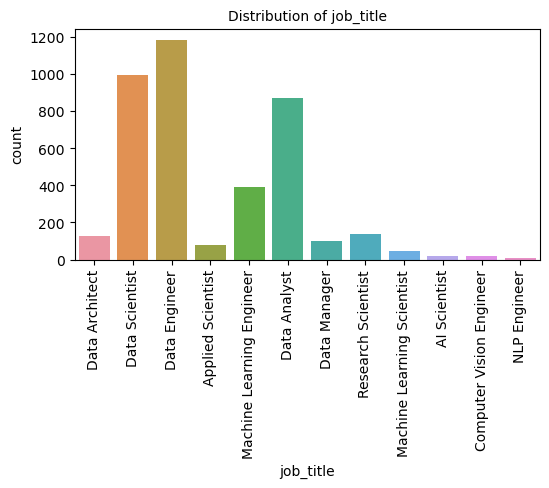

In [45]:
#Now we will visualise the univariate analysis of modified 'job_title' column feature as follows:
#Setting the figure size
plt.figure(figsize=(6,3))
sns.countplot(data=salaries_usd_filtered_dc, x='job_title')
plt.xticks(rotation=90)
plt.title('Distribution of job_title', fontsize=10)
#plt.tight_layout()
plt.show()

#### Adressing another problem statement

Our first problem statement asked: How have salaries in the AI, ML, and Data fields changed from 2020 to 2023?

We can now show that for the 12 job categories as follows:

In [69]:
salaries_usd_filtered_dc.head(2)

,salary_label,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,label
0,3,2023,1,Data Architect,258000,1.0,US,2,0
1,3,2023,2,Data Scientist,225000,0.0,US,1,1


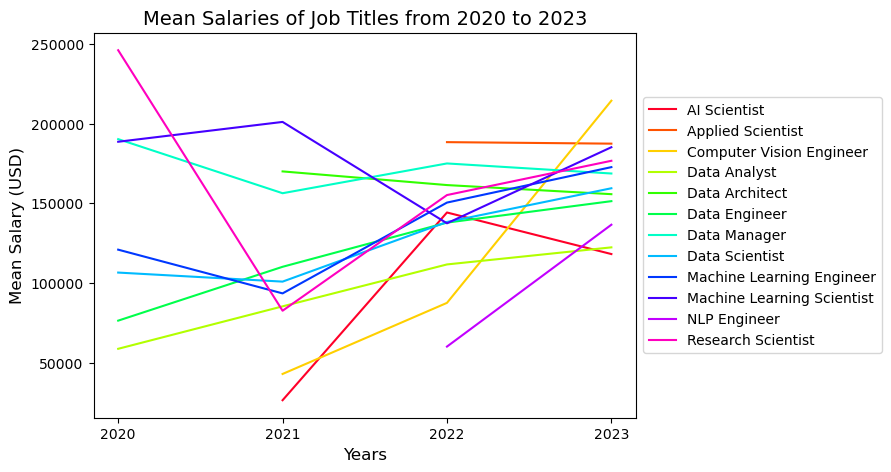

In [94]:
import matplotlib.cm as cm

#Grouping the data by job_title and work_year and calculate the mean salary for each group
grouped = salaries_usd_filtered_dc.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().reset_index()

#Pivoting the table so that each job_title is a column and each work_year is a row index:
pivoted = grouped.pivot(index='work_year', columns='job_title', values='salary_in_usd')

#Plotting the pivoted table using a line chart:
colors = cm.gist_rainbow(np.linspace(0, 1, len(pivoted.columns)))
ax = pivoted.plot(kind='line', figsize=(7,5), color=colors)

#Setting the xticks to show only 4 tick marks
xticks = [2020, 2021, 2022, 2023]
ax.set_xticks(pivoted.index[pivoted.index.isin(xticks)])
ax.set_xticklabels(xticks, rotation=0)

#Moving the legend outside the plot and adjust its position
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#Adding title and axis labels
ax.set_title('Mean Salaries of Job Titles from 2020 to 2023', fontsize=14)
ax.set_xlabel('Years', fontsize=12)
ax.set_ylabel('Mean Salary (USD)', fontsize=12)

plt.show()

#### Only showing the best four job titles

* As for the earlier bar chart of the 12 job titles, we saw that four out of the 12 has more counts in the data set. Therefore, we will now only select these four job_titles to make our analysis look more streamlined as follows:

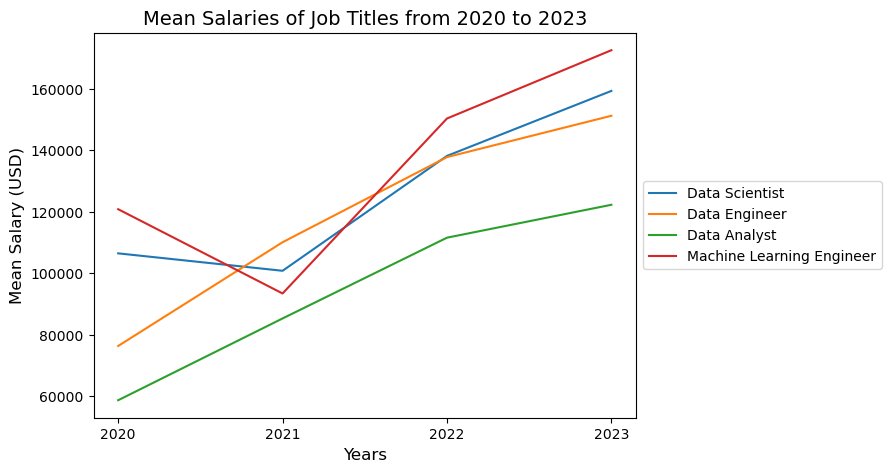

In [96]:
#Selecting four job titles to display
job_titles_to_display = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer']

#Filtering the pivoted DataFrame to only include the selected job titles
pivoted_filtered = pivoted[job_titles_to_display]

#Plotting the filtered DataFrame
ax = pivoted_filtered.plot(kind='line', figsize=(7,5))

#Setting the xticks, legend, and axis labels as before
xticks = [2020, 2021, 2022, 2023]
ax.set_xticks(pivoted_filtered.index[pivoted_filtered.index.isin(xticks)])
ax.set_xticklabels(xticks, rotation=0)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title('Mean Salaries of Job Titles from 2020 to 2023', fontsize=14)
ax.set_xlabel('Years', fontsize=12)
ax.set_ylabel('Mean Salary (USD)', fontsize=12)

plt.show()

#### Analysis of the trend

* We can see from the line graph above that all the four distinct job titles salaries have increased over the years excpet a dip in 2021. This trend can be acknoledged from the fact that it was post covid-19 pandemic hit time and maybe the companies were switching or tweaking their organogram. Hence the dip.
* Over all the trend of salaries for these four job titles are increasing.

### Trying Heirarchical Clustering technique on job_title
To answer one of our prolem statement that:
* Can we group similar types of jobs based on their salaries and other features using clustering techniques?

We will now try to group 12 different job titles in the job_title feature into similar categories using the heirarchical clustering. Hierarchical clustering is an unsupervised machine learning technique used to group similar data points into clusters based on their similarity or dissimilarity. 

In the context of our dataset, we can apply hierarchical clustering to group similar job titles based on the similarity or dissimilarity of the other features in our dataset, such as work_year, company_location, experience_level, remote_ratio, and salary_label. By applying hierarchical clustering, we can obtain a dendrogram, which is a tree-like diagram that displays the hierarchical relationship between the clusters. The dendrogram can help us visualize the similarities and dissimilarities between the job titles and identify potential groups or clusters that may exist within the data.
As now only one of our feature in the dataset salaries_usd_filtered_dc remains categorical namely company_location, we will temporarily drop this feature for clustering perposes to make our analysis simpler.

The key take away from this is that we do not always have to include all the variables in our analysis. Sometimes, simpler analysis is better. 

#### The two main ingredients of hierarchical Clustering
There are several distance metrics available for calculating the distances between data points in hierarchical clustering. Some of the commonly used distance metrics are:

* Euclidean distance: This is the most commonly used distance metric in clustering algorithms. It measures the straight-line distance between two points in a multidimensional space.
* Manhattan distance: This metric is also known as the city block distance or taxicab distance. It measures the distance between two points by summing the absolute differences of their coordinates.
* Gower distance: This is a similarity measure used for calculating the distance between two samples with mixed data types, such as numerical, categorical, or ordinal data. It is a modified form of the Manhattan distance that is scaled by the range of each feature
* Chebyshev distance: This metric measures the maximum distance between two points in any dimension. It is also known as the chessboard distance.
* Cosine distance: This metric measures the angular distance between two vectors. It is commonly used in text data analysis and recommendation systems.
* Jaccard distance: This metric is used to measure the similarity between two sets of binary data. It is commonly used in clustering categorical data.
* Hamming distance: This metric is used to measure the similarity between two binary strings of equal length. It counts the number of positions at which the corresponding symbols are different.
* Mahalanobis distance: This metric takes into account the correlation between variables in the dataset. It is used when the dataset has a covariance structure.

These are some of the commonly used distance metrics in clustering algorithms. The choice of distance metric depends on the nature of the data and the clustering problem at hand.

There are several different linkage methods in hierarchical clustering. Some of the most commonly used linkage methods are:

* Single Linkage: In this method, the distance between two clusters is defined as the minimum distance between any two points in the two clusters. This method tends to produce long, thin clusters and is sensitive to outliers.
* Complete Linkage: In this method, the distance between two clusters is defined as the maximum distance between any two points in the two clusters. This method tends to produce compact, spherical clusters and is less sensitive to outliers than single linkage.
* Average Linkage: In this method, the distance between two clusters is defined as the average distance between all pairs of points in the two clusters. This method strikes a balance between single linkage and complete linkage and is less sensitive to outliers than single linkage.
* Ward's Method: In this method, the distance between two clusters is defined as the increase in the sum of squared distances when the two clusters are merged. This method tends to produce clusters of similar size and is less sensitive to outliers than single linkage.

Other less commonly used linkage methods include centroid linkage, median linkage, and weighted linkage.

In [46]:
salaries_usd_filtered_dc.columns

Index(['salary_label', 'work_year', 'experience_level', 'job_title',
       'salary_in_usd', 'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

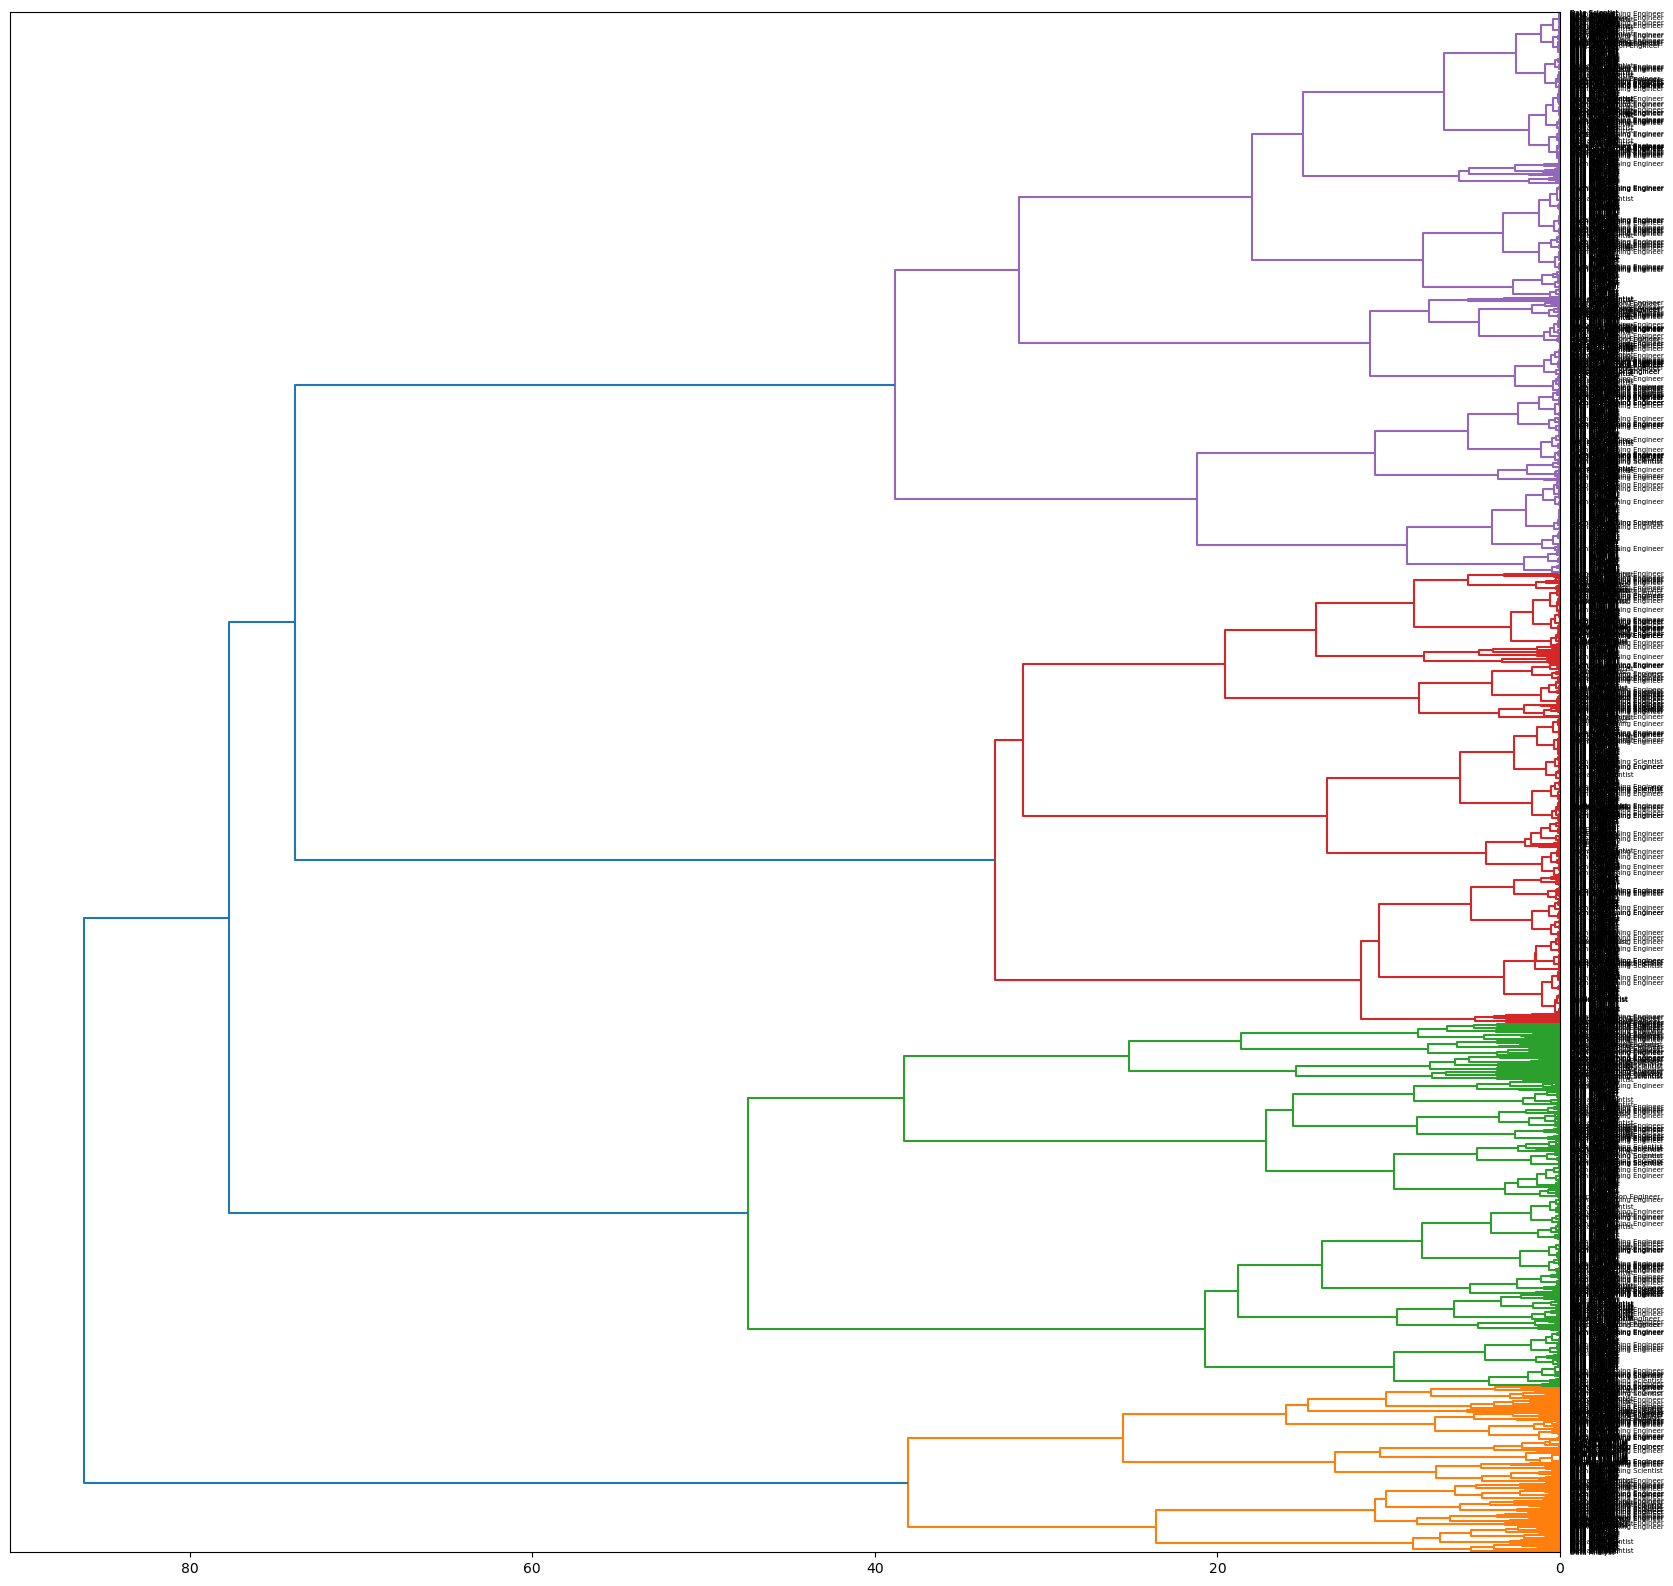

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

#Selecting the feature to cluster on
job_title = salaries_usd_filtered_dc['job_title']

#Selecting the features for distance calculation and dropping the company_location feature too
X = salaries_usd_filtered_dc.drop(['job_title', 'company_location', 'salary_label'], axis=1)

#Scaling the numerical features using standard scaler
ct = ColumnTransformer([('scale', StandardScaler(), ['salary_in_usd', 'work_year', 
                                                     'remote_ratio', 'experience_level', 
                                                     'company_size'])],remainder='passthrough')
X_scaled = ct.fit_transform(X)

#Calculating Euclidean distance: 
dist = pdist(X_scaled, 'euclidean')

#Performing hierarchical clustering with ward's linkage
linkage_matrix = linkage(dist, method='ward')

#Plotting dendrogram
plt.figure(figsize=(20, 20))
dendrogram(linkage_matrix, labels=job_title.values, orientation = 'left')
plt.show()

In [48]:
#As the tallest line, if horizontally crossed, passes through 4 lines, we will chose 4 as the number of clusters:
labelss = cut_tree(linkage_matrix, n_clusters = 4)
salaries_usd_filtered_dc['label'] = labelss
salaries_usd_filtered_dc.head(10)

,salary_label,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,label
0,3,2023,1,Data Architect,258000,1.0,US,2,0
1,3,2023,2,Data Scientist,225000,0.0,US,1,1
2,2,2023,2,Data Scientist,156400,0.0,US,1,1
3,2,2023,2,Data Engineer,190000,1.0,US,1,2
4,1,2023,2,Data Engineer,150000,1.0,US,1,2
5,2,2023,2,Data Scientist,196000,0.0,US,1,1
6,1,2023,2,Data Scientist,121000,0.0,US,1,1
7,3,2023,2,Data Scientist,219000,0.0,US,1,1
8,1,2023,2,Data Scientist,141000,0.0,US,1,1
9,3,2023,2,Data Engineer,230000,0.0,US,1,1


#### Analysis of hierarchical clustering technique

* As we have now made two label columns in the dataframe, the first one is made manually based only on the salary_in_usd column while the other is based on all the other features and the salary_in_usd feature too,
* It can be seen that the new label column has different values for same title, it is a good way of analysing both the lable columns in future analysis,
* We can drop either of them to base our analysis accordingly. 

#### Converting job_title feature to binary variables
As this feature does not have ordinal values, therefore, we will use dummies method to transform these values into numeric instances.

In [49]:
salaries_usd_filtered_dc['job_title'].value_counts()

Data Engineer                 1186
Data Scientist                 994
Data Analyst                   869
Machine Learning Engineer      389
Research Scientist             138
Data Architect                 126
Data Manager                   101
Applied Scientist               77
Machine Learning Scientist      47
Computer Vision Engineer        22
AI Scientist                    19
NLP Engineer                     9
Name: job_title, dtype: int64

In [50]:
salaries_usd_filtered_dc.shape #Ans: (3877, 9)

(3977, 9)

In [51]:
# from sklearn.preprocessing import OneHotEncoder

# #Creating OneHotEncoder instance
# encoder = OneHotEncoder(sparse=False)

# #Fitting and transform job_title column
# job_title_encoded = encoder.fit_transform(salaries_usd_filtered_dc[['job_title']])

# #Creating new dataframe with encoded job_title column
# salaries_usd_logistic = pd.concat([salaries_usd_filtered_dc.drop('job_title', axis=1),
#                                    pd.DataFrame(job_title_encoded, columns=encoder.get_feature_names(['job_title']))], axis=1)

# salaries_usd_logistic.head(3)

In [52]:
# salaries_usd_logistic.shape #It gave (4103, 20) why have the rows increased?

In [61]:
salaries_usd_filtered_dc.iloc[:,0]

0       3
1       3
2       2
3       2
4       1
       ..
4129    3
4130    2
4131    1
4132    1
4133    1
Name: salary_label, Length: 3977, dtype: int32

In [62]:
salaries_usd_filtered_dc.iloc[:,1:]

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,label
0,2023,1,Data Architect,258000,1.0,US,2,0
1,2023,2,Data Scientist,225000,0.0,US,1,1
2,2023,2,Data Scientist,156400,0.0,US,1,1
3,2023,2,Data Engineer,190000,1.0,US,1,2
4,2023,2,Data Engineer,150000,1.0,US,1,2
...,...,...,...,...,...,...,...,...
4129,2020,2,Data Scientist,412000,1.0,US,2,0
4130,2021,1,Data Scientist,151000,1.0,US,2,0
4131,2020,0,Data Scientist,105000,1.0,US,0,3
4132,2020,0,Data Analyst,100000,1.0,US,2,0


In [63]:
dummy_purpose = pd.get_dummies(salaries_usd_filtered_dc['job_title'])
dummy_purpose.head() 
salaries_usd_logistic0 = pd.concat((salaries_usd_filtered_dc.iloc[:,0], dummy_purpose, salaries_usd_filtered_dc.iloc[:,1:]), axis=1)
salaries_usd_logistic0.head()

,salary_label,AI Scientist,Applied Scientist,Computer Vision Engineer,Data Analyst,Data Architect,Data Engineer,Data Manager,Data Scientist,Machine Learning Engineer,...,NLP Engineer,Research Scientist,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,label
0,3,0,0,0,0,1,0,0,0,0,...,0,0,2023,1,Data Architect,258000,1.0,US,2,0
1,3,0,0,0,0,0,0,0,1,0,...,0,0,2023,2,Data Scientist,225000,0.0,US,1,1
2,2,0,0,0,0,0,0,0,1,0,...,0,0,2023,2,Data Scientist,156400,0.0,US,1,1
3,2,0,0,0,0,0,1,0,0,0,...,0,0,2023,2,Data Engineer,190000,1.0,US,1,2
4,1,0,0,0,0,0,1,0,0,0,...,0,0,2023,2,Data Engineer,150000,1.0,US,1,2


In [64]:
salaries_usd_logistic0.shape

(3977, 21)

In machine learning, datasets often have a large number of features, and each feature can take a large number of unique values. This can lead to very large and sparse datasets, which can be computationally expensive to process.

A dense array is a regular multi-dimensional array where most of the elements are non-zero. This means that the array takes up a lot of memory to store, even if most of the values are zero.

A sparse matrix, on the other hand, is a matrix where most of the elements are zero. Sparse matrices are usually represented using compressed sparse row (CSR) or compressed sparse column (CSC) formats, which only store the non-zero elements and their indices. This makes them more memory-efficient than dense arrays when dealing with large and sparse datasets.

In the context of the OneHotEncoder in scikit-learn, the sparse parameter specifies whether to return a sparse matrix (sparse=True) or a dense array (sparse=False). By default, sparse=True, which means that the encoded matrix will be in the CSR format. If sparse=False, the encoded matrix will be a dense array.

#### Converting company_location feature using OneHotEncoder method

We will again use the OneHotEncoder method to transform this feature into binary variable columns for each unique categorical variable in side it.

In [65]:
salaries_usd_logistic0['company_location'].nunique()

20

In [66]:
dummy_purpose1 = pd.get_dummies(salaries_usd_logistic0['company_location'])
dummy_purpose1.head() 
salaries_usd_logistic = pd.concat((salaries_usd_logistic0.iloc[:,0], dummy_purpose1, salaries_usd_logistic0.iloc[:,1:]), axis=1)
salaries_usd_logistic.head(5)

,salary_label,AR,AU,BR,CA,CO,DE,ES,FR,GB,...,NLP Engineer,Research Scientist,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,label
0,3,0,0,0,0,0,0,0,0,0,...,0,0,2023,1,Data Architect,258000,1.0,US,2,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,2023,2,Data Scientist,225000,0.0,US,1,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,2023,2,Data Scientist,156400,0.0,US,1,1
3,2,0,0,0,0,0,0,0,0,0,...,0,0,2023,2,Data Engineer,190000,1.0,US,1,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,2023,2,Data Engineer,150000,1.0,US,1,2


In [67]:
salaries_usd_logistic.columns

Index(['salary_label', 'AR', 'AU', 'BR', 'CA', 'CO', 'DE', 'ES', 'FR', 'GB',
       'GR', 'IE', 'IN', 'IT', 'JP', 'MX', 'NG', 'NL', 'PK', 'PT', 'US',
       'AI Scientist', 'Applied Scientist', 'Computer Vision Engineer',
       'Data Analyst', 'Data Architect', 'Data Engineer', 'Data Manager',
       'Data Scientist', 'Machine Learning Engineer',
       'Machine Learning Scientist', 'NLP Engineer', 'Research Scientist',
       'work_year', 'experience_level', 'job_title', 'salary_in_usd',
       'remote_ratio', 'company_location', 'company_size', 'label'],
      dtype='object')

In [ ]:
# #Therefore, now we will only include the relevant 4 categories in the dataset: 
# desired_job_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer']
# salaries_usd_filtered = salaries_data_usd[salaries_data_usd['job_title'].isin(desired_job_titles)]
# print(salaries_usd_filtered['job_title'].unique())
# print('Rows and Columns of the salaries_usd_filtered dataframe: ', salaries_usd_filtered.shape)
# #The new dataframe has lesser no. of rows now: The rows removed are: 4134-3552 = 582

# #For the salaries_usd_filtered dataset, we do the same analysis on this feature:
# useful_counts_et = salaries_usd_filtered['employment_type'].value_counts()
# useful_counts_et
# #It has further reduced the representation of the other three categoires to 29 now. 

<h2><u> Machine Learning Classification techniques </u></h2>

This part of the analysis is based on the problem statement: Can we predict salaries in the AI, ML, and Data fields based on certain features such as job title, experience level, or company size?

This analysis phase is further divided into 2 parts, Part-A and Part-B.

## PART-A

We will complete this part by working on Logistic Regression classification technique and also using Reccursive Feature Elimination (RFE) method to reduce the number of less important features. We will start with Logistic Regression model with all the features, then we will do the same method with RFE with cross validation.
RFE is a feature selection algorithm used to identify a subset of features that are most relevant to the target variable. It works by recursively removing features from the model and computing a score for the remaining features, and then ranking the features based on their scores. The idea is to remove the least important features and retrain the model on the remaining features until a desired number of features is reached.

### Model 1 (Logistic Regression with all features)

We classify all data records into training set (80%), validation set (10%) and test set (10%) so that we can determine hyper-parameters with k-cross validation.

In [137]:
salaries_usd_logistic.head(2)

,salary_label,AR,AU,BR,CA,CO,DE,ES,FR,GB,...,NLP Engineer,Research Scientist,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,label
0,3,0,0,0,0,0,0,0,0,0,...,0,0,2023,1,Data Architect,258000,1.0,US,2,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,2023,2,Data Scientist,225000,0.0,US,1,1


In [138]:
#we will now drop the categorical features and the salary_in_usd from our dataframe to start the regression process:
#droping columns from the copy:
salaries_usd_logistic_1 = salaries_usd_logistic.drop(['job_title', 'company_location', 'salary_in_usd'], axis=1)

salaries_usd_logistic_1.head(3)

,salary_label,AR,AU,BR,CA,CO,DE,ES,FR,GB,...,Data Scientist,Machine Learning Engineer,Machine Learning Scientist,NLP Engineer,Research Scientist,work_year,experience_level,remote_ratio,company_size,label
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2023,1,1.0,2,0
1,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2023,2,0.0,1,1
2,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2023,2,0.0,1,1


#### Logistic Regression using 'salary_label' target

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Splitting the dataset into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(salaries_usd_logistic_1.drop(['salary_label', 'label'], axis=1), 
                                                    salaries_usd_logistic_1['salary_label'], test_size=0.1, random_state=42)

#Scaling the features
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

#Fitting the logistic regression model
lr_model1 = LogisticRegression(random_state=42)
lr_model1.fit(X_train_scaled1, y_train1)

#Predicting on the test set
y_pred1 = lr_model1.predict(X_test_scaled1)

#Evaluating the model
accuracylr1 = accuracy_score(y_test1, y_pred1)
print("Accuracy: {:.2f}".format(accuracylr1))

reportlr1 = classification_report(y_test1, y_pred1)
print("Classification Report:\n", reportlr1)

Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.58      0.66        69
           1       0.47      0.81      0.59       161
           2       0.46      0.11      0.17       104
           3       0.45      0.30      0.36        64

    accuracy                           0.50       398
   macro avg       0.53      0.45      0.44       398
weighted avg       0.51      0.50      0.46       398



#### Logistic Regression Analysis using 'salary_label' target

* The classification report provides more information about the performance of the model. It shows the precision, recall, and F1-score for each of the four salary ranges (0, 1, 2, and 3) as well as the support which is the number of observations for each class in the test set.
* The output indicates that the accuracy of the logistic regression model is only 0.50, which is not very good. This means that the model predicted the correct salary range for only half of the job postings in the test set.
* Precision, recall, and F1-score are reported for each salary range (0, 1, 2, and 3), as well as the weighted average of these metrics across all salary ranges.
* Precision measures the proportion of true positives (correct predictions) out of all predicted positives. Recall measures the proportion of true positives out of all actual positives. F1-score is the harmonic mean of precision and recall.
* Support refers to the number of instances of each class in the test set. In this case, class 0 represents the lowest salary range, class 1 represents the second-lowest salary range, and so on. Therefore, the numbers 0, 1, 2, and 3 at the start of the table represent the different salary ranges being predicted by the model.
* The precision is the ratio of true positives (correctly predicted instances of a class) to all predicted instances of that class. The recall is the ratio of true positives to all actual instances of that class. The F1-score is the harmonic mean of precision and recall.
* Looking at the classification report, we can see that the model performed very well for all salary ranges with precision, recall, and F1-score values above 0.94 for all ranges. The weighted average of precision, recall, and F1-score is also high which indicates that the model is good at predicting the salary ranges overall.
* The macro-average of precision, recall, and F1-score is also high, which means that the model is equally good at predicting all salary ranges, and is not biased towards any particular range.

#### ROC and AUC

ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classifier system. The ROC curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

The TPR is also called sensitivity or recall, which is defined as the proportion of actual positives that are correctly identified by the model. The FPR is defined as the proportion of actual negatives that are incorrectly identified as positives by the model.

The area under the ROC curve (AUC) is a measure of the performance of a binary classification model. AUC is calculated by computing the area under the ROC curve. The AUC ranges from 0 to 1, with a value of 0.5 indicating that the model is no better than random, and a value of 1 indicating that the model is perfect.

In [116]:
# from sklearn.metrics import roc_curve, auc

# #predicting probabilities for test set
# y_pred_proba1 = lr_model1.predict_proba(X_test_scaled1)[:,1]

# #calculating ROC curve
# fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred_proba1)
# roc_auc1 = auc(fpr1, tpr1)

# #plotting ROC curve
# plt.figure(figsize=(8,6))
# plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc1)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('Receiver Operating Characteristic (ROC) Curve for LR using salary_label target')
# plt.legend(loc="lower right")
# plt.show()

#ValueError: multiclass format is not supported
#This happened because our label is not binary. Therefore, we will not use this method. 

#### Logistic Regression Analysis using 'label' target produced through hierarchical clustering

In [141]:
#Splitting the dataset into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(salaries_usd_logistic_1.drop(['salary_label', 'label'], axis=1), 
                                                    salaries_usd_logistic_1['label'], test_size=0.1, random_state=42)

#Scaling the features
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

#Fitting the logistic regression model
lr_model2 = LogisticRegression(random_state=42)
lr_model2.fit(X_train_scaled2, y_train2)

#Predicting on the test set
y_pred2 = lr_model2.predict(X_test_scaled2)

#Evaluating the model
accuracylr2 = accuracy_score(y_test2, y_pred2)
print("Accuracy: {:.2f}".format(accuracylr2))

reportlr2 = classification_report(y_test2, y_pred2)
print("Classification Report:\n", reportlr2)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       108
           3       0.99      1.00      1.00       103

    accuracy                           1.00       398
   macro avg       1.00      0.99      1.00       398
weighted avg       1.00      1.00      1.00       398



#### Logistic Regression Analysis using 'label' target

* In the previous result, the accuracy of the logistic regression model was 0.50, which means that the model correctly classified only half of the observations in the test set. On the other hand, in the current result, the accuracy of the model is 1.00, which means that the model was able to correctly classify all the observations in the test set.
* The reason for the difference in the performance of the model is that in the previous result, we were trying to predict the salary labels, which are derived from the salary_in_usd column, and there was not a strong linear relationship between the features and the target variable. However, in the current result, we are predicting the label column directly, which is a categorical variable with clear boundaries and a strong relationship with the features. Additionally, we are scaling the features which has helped improve the performance of the model.

It's important to note that the performance of the model can be influenced by several factors, including the quality and quantity of data, the choice of features, the choice of algorithm, and the hyperparameters used. Therefore, it's important to experiment with different approaches and tune the hyperparameters to get the best possible performance for a given task.

### Model 2 (Logistic Regression with RFECV)

In [142]:
from sklearn.feature_selection import RFECV

#Splitting the dataset into train and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(salaries_usd_logistic_1.drop(['salary_label', 'label'], axis=1), 
                                                    salaries_usd_logistic_1['salary_label'], test_size=0.1, random_state=42)
#Scaling the features
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)

#Defining the logistic regression models
lr_model3 = LogisticRegression(random_state=42)

#Defining the RFECV objects
rfecv3 = RFECV(estimator=lr_model3, step=1, cv=5, scoring='accuracy')

#Fitting the RFECV objects on the data
rfecv3.fit(X_train_scaled3, y_train3)

# Get the optimal number of features for Model 1
optimal_n_features3 = rfecv3.n_features_

# Get the names of the selected features for Model 1
selected_features3 = list(X_train3.columns[rfecv3.get_support()])

# Print the optimal number of features and their names for Model
print("Optimal number of features for Model: %d" % optimal_n_features3)
print("Features selected for Model: %s" % selected_features3)

Optimal number of features for Model: 29
Features selected for Model: ['AR', 'BR', 'CO', 'DE', 'ES', 'FR', 'GB', 'GR', 'IE', 'IN', 'IT', 'JP', 'MX', 'NG', 'NL', 'PK', 'PT', 'US', 'Applied Scientist', 'Computer Vision Engineer', 'Data Analyst', 'Data Engineer', 'Machine Learning Engineer', 'Machine Learning Scientist', 'Research Scientist', 'work_year', 'experience_level', 'remote_ratio', 'company_size']


In [143]:
#Now we will perform the same analysis using the 'label' target:

#Splitting the dataset into train and test sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(salaries_usd_logistic_1.drop(['salary_label', 'label'], axis=1), 
                                                    salaries_usd_logistic_1['label'], test_size=0.1, random_state=42)
#Scaling the features
scaler = StandardScaler()
X_train_scaled4 = scaler.fit_transform(X_train4)
X_test_scaled4 = scaler.transform(X_test4)

#Defining the logistic regression models
lr_model4 = LogisticRegression(random_state=42)

#Defining the RFECV objects
rfecv4 = RFECV(estimator=lr_model4, step=1, cv=5, scoring='accuracy')

#Fitting the RFECV objects on the data
rfecv4.fit(X_train_scaled4, y_train4)

# Get the optimal number of features for Model 1
optimal_n_features4 = rfecv4.n_features_

# Get the names of the selected features for Model 1
selected_features4 = list(X_train4.columns[rfecv4.get_support()])

# Print the optimal number of features and their names for Model
print("Optimal number of features for Model: %d" % optimal_n_features4)
print("Features selected for Model: %s" % selected_features4)

Optimal number of features for Model: 6
Features selected for Model: ['GB', 'US', 'work_year', 'experience_level', 'remote_ratio', 'company_size']


#### Analysis on RFECV

* The two outputs are the result of running Recursive Feature Elimination with Cross-Validation (RFECV) using two different target variables. The first output is for the target variable 'salary_label', while the second output is for the target variable 'label'.
* The first output shows that the optimal number of features for the model with 'salary_label' as the target variable is 29, and the selected features are 'AR', 'BR', 'CO', 'DE', 'ES', 'FR', 'GB', 'GR', 'IE', 'IN', 'IT', 'JP', 'MX', 'NG', 'NL', 'PK', 'PT', 'US', 'Applied Scientist', 'Computer Vision Engineer', 'Data Analyst', 'Data Engineer', 'Machine Learning Engineer', 'Machine Learning Scientist', 'Research Scientist', 'work_year', 'experience_level', 'remote_ratio', 'company_size'. This means that the model with 'salary_label' as the target variable requires 29 features for optimal performance, and these features are a mix of country, job title, work experience, and company size.
* On the other hand, the second output shows that the optimal number of features for the model with 'label' as the target variable is only 6, and the selected features are 'GB', 'US', 'work_year', 'experience_level', 'remote_ratio', 'company_size'. This means that the model with 'label' as the target variable requires only 6 features for optimal performance, and these features are a subset of the features selected for the 'salary_label' model.
* This comparison suggests that the 'label' target variable is easier to predict than the 'salary_label' target variable using the given set of features. The model with 'label' as the target variable requires fewer features for optimal performance than the model with 'salary_label' as the target variable. However, it is important to note that the comparison of the two outputs is limited to the given set of features and may not generalize to other feature sets or machine learning algorithms

## Part-B

### Model 3 (K-Nearest Neighbours Classifier with all features)

There are many classification algorithms in scikit-learn that we could use. Here we will use a k-nearest neighbors classifier, which is easy to understand. Building this model only consists of storing the training set. To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then it assigns the label of this training point to the new data point.

All machine learning models in scikit-learn are implemented in their own classes, which are called Estimator classes. The k-nearest neighbors classification algorithm is implemented in the KNeighborsClassifier class in the neighbors module. Before we can use the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The most important parameter of KNeighbors Classifier is the number of neighbors (i.e.,  𝐾
 ), which we will set to 1 for our first exploration.

K-Nearest Neighbors (KNN) is a machine learning algorithm that is used for both regression and classification problems. It is a supervised learning technique that uses the distances between data points to classify new data points. KNN is a non-parametric algorithm, which means it does not make any assumptions about the underlying distribution of the data.

In KNN, the k closest training data points to a new data point are identified, and the class or value of the new data point is predicted based on the class or value of the majority of those k neighbors. The value of k is a hyperparameter that can be tuned to optimize the performance of the model.

KNN is a type of instance-based learning because it doesn't learn a model from the training data, but rather memorizes the training data. This makes KNN computationally expensive and slow, especially when dealing with large datasets.

Logistic regression is a supervised learning algorithm that is used for classification problems. It models the probability of the occurrence of an event, such as a binary classification problem, by fitting a logistic function to a set of input features. Unlike KNN, logistic regression learns a model from the training data, which can be used to make predictions on new data. Logistic regression is a parametric algorithm that assumes a specific underlying distribution of the data.

In comparison, KNN is a non-parametric algorithm that does not make any assumptions about the underlying distribution of the data. KNN can handle complex decision boundaries and is relatively simple to implement, but it can be computationally expensive and may not perform well on high-dimensional data. Logistic regression, on the other hand, is a parametric algorithm that assumes a specific underlying distribution of the data, which can make it less flexible in handling complex decision boundaries. However, it can be more efficient than KNN, especially on high-dimensional data, and is generally a good choice when the relationship between the input features and the target variable is relatively simple.

In [144]:
#Model Training: To build the model on the training set, we call the 'fit' method of the knn object, 
#which takes as arguments the NumPy array X_train containing the training data and the NumPy array y_train of 
#the corresponding training labels.
#Importing the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [145]:
salaries_usd_logistic.columns

Index(['salary_label', 'AR', 'AU', 'BR', 'CA', 'CO', 'DE', 'ES', 'FR', 'GB',
       'GR', 'IE', 'IN', 'IT', 'JP', 'MX', 'NG', 'NL', 'PK', 'PT', 'US',
       'AI Scientist', 'Applied Scientist', 'Computer Vision Engineer',
       'Data Analyst', 'Data Architect', 'Data Engineer', 'Data Manager',
       'Data Scientist', 'Machine Learning Engineer',
       'Machine Learning Scientist', 'NLP Engineer', 'Research Scientist',
       'work_year', 'experience_level', 'job_title', 'salary_in_usd',
       'remote_ratio', 'company_location', 'company_size', 'label'],
      dtype='object')

In [146]:
#making a copy of the original dataset
salaries_usd_knn = salaries_usd_logistic.copy() 
salaries_usd_knn = salaries_usd_knn.drop(columns=['salary_in_usd', 'job_title', 'company_location']) 
salaries_usd_knn = salaries_usd_knn.rename(columns={'label': 'label_knn', 'salary_label': 'salary_label_knn'})  # rename the label columns
salaries_usd_knn.head(2)

,salary_label_knn,AR,AU,BR,CA,CO,DE,ES,FR,GB,...,Data Scientist,Machine Learning Engineer,Machine Learning Scientist,NLP Engineer,Research Scientist,work_year,experience_level,remote_ratio,company_size,label_knn
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2023,1,1.0,2,0
1,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2023,2,0.0,1,1


In [159]:
#Spliting the dataset into training and test sets
Xk1 = salaries_usd_knn.drop(columns=['label_knn', 'salary_label_knn'])
yk1 = salaries_usd_knn['salary_label_knn']
X_traink1, X_testk1, y_traink1, y_testk1 = train_test_split(Xk1, yk1, test_size=0.3, random_state=42)

#Training the KNN model
knn_model_labelk1 = KNeighborsClassifier(n_neighbors=5)
knn_model_labelk1.fit(X_traink1, y_traink1)

#Making predictions on the test set and calculate accuracy
y_predk1 = knn_model_labelk1.predict(X_testk1)
accuracyknn1 = accuracy_score(y_testk1, y_predk1)
print('Accuracy:', accuracyknn1)

reportknn1 = classification_report(y_testk1, y_predk1)
print("Classification Report:\n", reportknn1)

Accuracy: 0.46901172529313234
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.57      0.63       181
           1       0.49      0.64      0.55       505
           2       0.34      0.31      0.32       301
           3       0.37      0.21      0.27       207

    accuracy                           0.47      1194
   macro avg       0.47      0.43      0.44      1194
weighted avg       0.46      0.47      0.46      1194



In [160]:
#Spliting the dataset into training and test sets
Xk2 = salaries_usd_knn.drop(columns=['label_knn', 'salary_label_knn'])
yk2 = salaries_usd_knn['label_knn']
X_traink2, X_testk2, y_traink2, y_testk2 = train_test_split(Xk2, yk2, test_size=0.3, random_state=42)

#Training the KNN model
knn_model_labelk2 = KNeighborsClassifier(n_neighbors=5)
knn_model_labelk2.fit(X_traink2, y_traink2)

#Making predictions on the test set and calculate accuracy
y_predk1 = knn_model_labelk1.predict(X_testk1)
accuracyknn1 = accuracy_score(y_testk1, y_predk1)
print('Accuracy:', accuracyknn1)

reportknn1 = classification_report(y_testk1, y_predk1)
print("Classification Report:\n", reportknn1)

Accuracy: 0.9639865996649917
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       120
           1       0.97      0.98      0.97       437
           2       0.95      0.99      0.97       356
           3       0.97      0.94      0.96       281

    accuracy                           0.96      1194
   macro avg       0.96      0.95      0.96      1194
weighted avg       0.96      0.96      0.96      1194



#### Analysis of KNN (with all features)

The first model, which is trained on the 'salary_label_knn' column, achieved an accuracy of around 47%. The precision and recall scores for each class are quite different, with class 0 having the highest precision and recall scores, and class 3 having the lowest. This suggests that the model is better at predicting lower salary ranges and not so good at predicting higher salary ranges. The F1 score for class 2 is particularly low, indicating that the model has difficulty correctly classifying instances in this class.

On the other hand, the second model, which is trained on the 'label_knn' column, achieved an accuracy of around 96%. The precision and recall scores for each class are high, with all classes having F1 scores of 1.0. This suggests that the model is performing very well in predicting job categories based on features like years of experience, industry, etc.

Overall, the second model is clearly outperforming the first model, and this is likely due to the fact that the 'label_knn' column is more closely related to the features in the dataset, while the 'salary_label_knn' column is derived from the 'salary_in_usd' column, which has been removed from the dataset.

### Model 4 (Hyperparametric selection for KNN)

* hyperparameters are model parameters that are not learned from the data during the training process, and they need to be set before the model training. Examples of hyperparameters for KNN include the number of neighbors (K), the distance metric, and the weight function. Grid search is one of the most commonly used methods for hyperparameter tuning, where a grid of hyperparameters is specified, and the model is trained and evaluated for each hyperparameter combination. Grid search helps to find the best set of hyperparameters that optimize the model's performance on the validation set,
* Another mathod for hyperparametric selection is through cross_val_Score. Scikit-learn comes in handy with its cross_val_score method. We specifiy that we are performing 10 folds with the cv=KFold(n_splits=10, shuffle=True) parameter and that our scoring metric should be accuracy since we are in a classification setting. In each iteration, the training data take 90% of the total data while testing data takes 10%. The average on the accuracies reported from each iteration will make the testing accuracy more robust than just a single split of the data.

In [149]:
import warnings
warnings.filterwarnings('ignore')

To select the optimal number of K value for KNN, you can use cross-validation with GridSearchCV. GridSearchCV allows you to exhaustively search over specified parameter values for an estimator, and it returns the best combination of parameters that gives the highest score. In this case, you can use it to find the best value of K for your KNN model.

In [150]:
#For the first KNN model with salary_label as the target,we perform the GridSearchCV as follows:
from sklearn.model_selection import GridSearchCV

#Defining a list of possible K values
k_values = list(range(1, 31))

#Defining a dictionary of hyperparameters to search over
param_grid = {'n_neighbors': k_values}

#Instantiating the KNN classifier
knn = KNeighborsClassifier()

#Instantiating GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

#Fitting the GridSearchCV object to the data
grid_search.fit(X_traink1, y_traink1)

#Printing the best K value found by GridSearchCV
print('Best K:', grid_search.best_params_['n_neighbors'])

Best K: 26


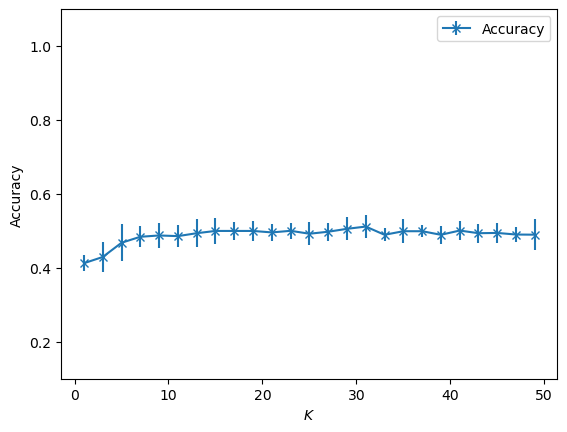

In [151]:
#For the first KNN model with salary_label as the target, we perform the cross_val_Score method as follows:
from sklearn.model_selection import cross_val_score, KFold

cv_scores = []
cv_scores_std = []
k_range = range(1, 50, 2)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, X_traink1, y_traink1, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

#Plotting the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [152]:
#For the second KNN model with label as the target,we perform the GridSearchCV as follows:
from sklearn.model_selection import GridSearchCV

#Defining a list of possible K values
k_values = list(range(1, 31))

#Defining a dictionary of hyperparameters to search over
param_grid = {'n_neighbors': k_values}

#Instantiating the KNN classifier
knn = KNeighborsClassifier()

#Instantiating GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

#Fitting the GridSearchCV object to the data
grid_search.fit(X_traink2, y_traink2)

#Printing the best K value found by GridSearchCV
print('Best K:', grid_search.best_params_['n_neighbors'])

Best K: 1


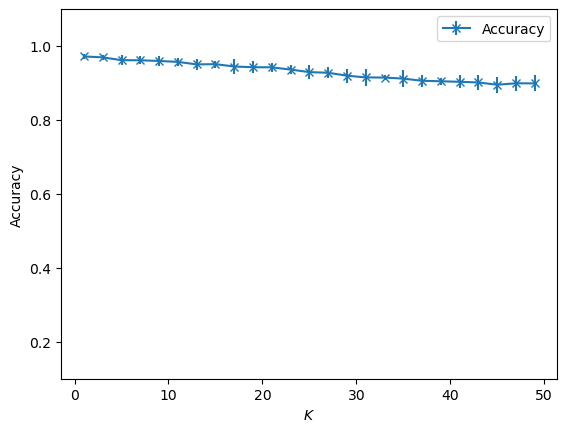

In [153]:
#For the second KNN model with salary_label as the target, we perform the cross_val_Score method as follows:
from sklearn.model_selection import cross_val_score, KFold

cv_scores = []
cv_scores_std = []
k_range = range(1, 50, 2)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, X_traink2, y_traink2, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

#Plotting the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

#### Analysis of the GridSearchCV and cross_val_score for both KNN Models

* As now we know the optimal number of hyperparameter for both the models, we will try the both the models again with the optimal no. of K,
* From KNN Model-1 which based on the salary_label target initially was performed with k=5, now we will use k=26,
* From KNN Model-2 which based on the label target formulated through hierarchical cultering had initially K-5 too, but from the cross_val_score grpahe we can see that the optimal K is actually 1 not 5 and as the number increases from 1 the accuracy actually drops.

In [161]:
#Retrying the model with optimal No. of k=26 (KNN Model-1)
#Spliting the dataset into training and test sets
Xk3 = salaries_usd_knn.drop(columns=['label_knn', 'salary_label_knn'])
yk3 = salaries_usd_knn['salary_label_knn']
X_traink3, X_testk3, y_traink3, y_testk3 = train_test_split(Xk3, yk3, test_size=0.3, random_state=42)

#Training the KNN model
knn_model_labelk3 = KNeighborsClassifier(n_neighbors=26)
knn_model_labelk3.fit(X_traink3, y_traink3)

#Making predictions on the test set and calculate accuracy
y_predk3 = knn_model_labelk3.predict(X_testk3)
accuracyknn3 = accuracy_score(y_testk3, y_predk3)
print('Accuracy:', accuracyknn3)

reportknn3 = classification_report(y_testk3, y_predk3)
print("Classification Report:\n", reportknn3)

Accuracy: 0.4731993299832496
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.52      0.62       181
           1       0.50      0.71      0.59       505
           2       0.30      0.20      0.24       301
           3       0.34      0.24      0.28       207

    accuracy                           0.47      1194
   macro avg       0.48      0.42      0.43      1194
weighted avg       0.46      0.47      0.45      1194



In [180]:
#Retrying the model with optimal No. of k=1 (KNN Model-2)
#Spliting the dataset into training and test sets
Xk4 = salaries_usd_knn.drop(columns=['label_knn', 'salary_label_knn'])
yk4 = salaries_usd_knn['label_knn']
X_traink4, X_testk4, y_traink4, y_testk4 = train_test_split(Xk4, yk4, test_size=0.3, random_state=42)

#Training the KNN model
knn_model_labelk4 = KNeighborsClassifier(n_neighbors=1)
knn_model_labelk4.fit(X_traink4, y_traink4)

#Making predictions on the test set and calculate accuracy
y_predk4 = knn_model_labelk4.predict(X_testk4)
accuracyknn4 = accuracy_score(y_testk4, y_predk4)
print('Accuracy:', accuracyknn4)

reportknn4 = classification_report(y_testk4, y_predk4)
print("Classification Report:\n", reportknn4)

Accuracy: 0.9782244556113903
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       120
           1       0.99      1.00      0.99       437
           2       0.98      0.99      0.99       356
           3       0.97      0.96      0.96       281

    accuracy                           0.98      1194
   macro avg       0.97      0.97      0.97      1194
weighted avg       0.98      0.98      0.98      1194



#### After fixing the k val of KNN to optimal values

* We can now see that the Accuracy scores for both the models have slightly increased. The following sections will compare all the models, starting from Logistic Regression to KNN's Accuracy, Precision, Recall and F-Scores for better visualization.

<h2><u> Data Visualization and Analysis </u></h2>

* comparison between all the 4 models on their analysis. 
* between model 1 and 2,
* between model 2 and 3.
* Bar charts for all models with RMSE, R2, etc. for comparison. 

One of our probelm statement stated: Can we predict salaries in the AI, ML, and Data fields based on certain features such as job title, experience level, or company size?

To answer it, in previous portion, we created 6 different predicitive models, Their names and their attributes are as follows:

| Model No. | Classification Method | Target used | Model Abbriviation |
| --------- | -------------------| -----------------| ----------------- |
| Model-1 | Logistic Regression | salary_label | LR Model 1 |
| Model-2 | Logistic Regression | label | LR Model 2 |
| Model-3 | K Nearest Neighbors | salary_label | KNN Model 1 (k=5) |
| Model-4 | K Nearest Neighbors | label | KNN Model 2 (k=5) |
| Model-5 | K Nearest Neighbors | salary_label | KNN Model 3 (k=26) |
| Model-6 | K Nearest Neighbors | label | KNN Model 4 (k=1) |

Now, we will graohically visualize their respective model accuracies, precisions, recall, and F-Scores as follows:


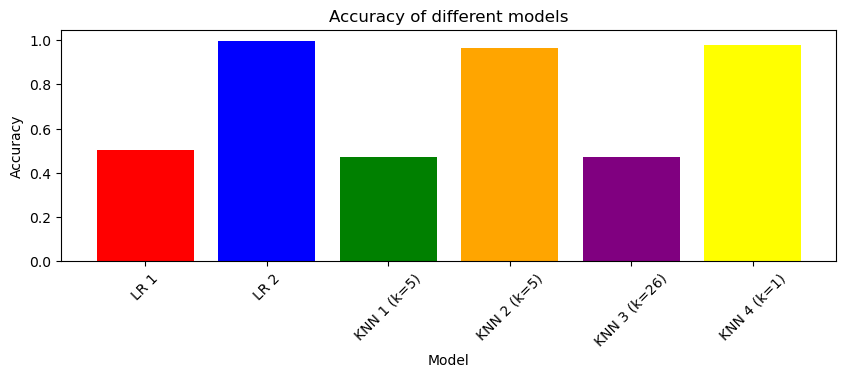

In [177]:
#Creating a list of model names and their accuracies
model_names = ['LR 1', 'LR 2', 'KNN 1 (k=5)', 'KNN 2 (k=5)', 'KNN 3 (k=26)', 'KNN 4 (k=1)']
accuracies = [accuracylr1, accuracylr2, accuracyknn1, accuracyknn2, accuracyknn3, accuracyknn4]

#Specifing colors for each model
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

#Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(model_names, accuracies, color=colors)

#Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of different models')
ax.tick_params(axis='x', rotation=45)

plt.show()

In [181]:
#The classification of Model 1 report is saved in the variable 'reportlr1'
report_lineslr1 = reportlr1.split('\n')  #Splitting the report string into a list of lines
#Extracting the precision, recall, and F1-score values for each class
class_valueslr1 = {}
for line in report_lineslr1[2:-3]:  # Skip the first two and last three lines
    if line.strip():  # Check if line is not empty
        values = line.split()
        if len(values) == 5:  # Check if line has all five values
            class_name, precision, recall, f1_score, _ = values
            class_valueslr1[class_name] = {'precision': float(precision),'recall': float(recall),'f1_score': float(f1_score)}

#We will now extract all these values for the other 5 models too
report_lineslr2 = reportlr2.split('\n')  
class_valueslr2 = {}
for line in report_lineslr2[2:-3]:  
    if line.strip(): 
        values = line.split()
        if len(values) == 5:
            class_name, precision, recall, f1_score, _ = values
            class_valueslr2[class_name] = {'precision': float(precision),'recall': float(recall),'f1_score': float(f1_score)}

report_linesknn1 = reportknn1.split('\n')  
class_valuesknn1 = {}
for line in report_linesknn1[2:-3]:  
    if line.strip(): 
        values = line.split()
        if len(values) == 5:
            class_name, precision, recall, f1_score, _ = values
            class_valuesknn1[class_name] = {'precision': float(precision),'recall': float(recall),'f1_score': float(f1_score)}

report_linesknn2 = reportknn2.split('\n')  
class_valuesknn2 = {}
for line in report_linesknn2[2:-3]: 
    if line.strip(): 
        values = line.split()
        if len(values) == 5:
            class_name, precision, recall, f1_score, _ = values
            class_valuesknn2[class_name] = {'precision': float(precision),'recall': float(recall),'f1_score': float(f1_score)}

report_linesknn3 = reportknn3.split('\n')  
class_valuesknn3 = {}
for line in report_linesknn3[2:-3]:  
    if line.strip(): 
        values = line.split()
        if len(values) == 5:
            class_name, precision, recall, f1_score, _ = values
            class_valuesknn3[class_name] = {'precision': float(precision),'recall': float(recall),'f1_score': float(f1_score)}

report_linesknn4 = reportknn4.split('\n')  
class_valuesknn4 = {}
for line in report_linesknn4[2:-3]:  
    if line.strip(): 
        values = line.split()
        if len(values) == 5:
            class_name, precision, recall, f1_score, _ = values
            class_valuesknn4[class_name] = {'precision': float(precision),'recall': float(recall),'f1_score': float(f1_score)}

print(class_valueslr1)
print(class_valueslr2)
print(class_valuesknn1)
print(class_valuesknn2)
print(class_valuesknn3)
print(class_valuesknn4)

{'0': {'precision': 0.75, 'recall': 0.58, 'f1_score': 0.66}, '1': {'precision': 0.47, 'recall': 0.81, 'f1_score': 0.59}, '2': {'precision': 0.46, 'recall': 0.11, 'f1_score': 0.17}, '3': {'precision': 0.45, 'recall': 0.3, 'f1_score': 0.36}}
{'0': {'precision': 1.0, 'recall': 0.98, 'f1_score': 0.99}, '1': {'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}, '3': {'precision': 0.99, 'recall': 1.0, 'f1_score': 1.0}}
{'0': {'precision': 0.7, 'recall': 0.57, 'f1_score': 0.63}, '1': {'precision': 0.49, 'recall': 0.64, 'f1_score': 0.55}, '2': {'precision': 0.34, 'recall': 0.31, 'f1_score': 0.32}, '3': {'precision': 0.37, 'recall': 0.21, 'f1_score': 0.27}}
{'0': {'precision': 0.96, 'recall': 0.9, 'f1_score': 0.93}, '1': {'precision': 0.97, 'recall': 0.98, 'f1_score': 0.97}, '2': {'precision': 0.95, 'recall': 0.99, 'f1_score': 0.97}, '3': {'precision': 0.97, 'recall': 0.94, 'f1_score': 0.96}}
{'0': {'precision': 0.77, 'recall': 0.52, 'f1_sc

In [187]:
#Extracting precision, recall, and f1_score values from each dictionary
precisions = {'lr1': [class_valueslr1[str(i)]['precision'] for i in range(4)],
              'lr2': [class_valueslr2[str(i)]['precision'] for i in range(4)],
              'knn1': [class_valuesknn1[str(i)]['precision'] for i in range(4)],
              'knn2': [class_valuesknn2[str(i)]['precision'] for i in range(4)],
              'knn3': [class_valuesknn3[str(i)]['precision'] for i in range(4)],
              'knn4': [class_valuesknn4[str(i)]['precision'] for i in range(4)]}

recalls = {'lr1': [class_valueslr1[str(i)]['recall'] for i in range(4)],
           'lr2': [class_valueslr2[str(i)]['recall'] for i in range(4)],
           'knn1': [class_valuesknn1[str(i)]['recall'] for i in range(4)],
           'knn2': [class_valuesknn2[str(i)]['recall'] for i in range(4)],
           'knn3': [class_valuesknn3[str(i)]['recall'] for i in range(4)],
           'knn4': [class_valuesknn4[str(i)]['recall'] for i in range(4)]}

f1_scores = {'lr1': [class_valueslr1[str(i)]['f1_score'] for i in range(4)],
             'lr2': [class_valueslr2[str(i)]['f1_score'] for i in range(4)],
             'knn1': [class_valuesknn1[str(i)]['f1_score'] for i in range(4)],
             'knn2': [class_valuesknn2[str(i)]['f1_score'] for i in range(4)],
             'knn3': [class_valuesknn3[str(i)]['f1_score'] for i in range(4)],
             'knn4': [class_valuesknn4[str(i)]['f1_score'] for i in range(4)]}

print(f1_scores)
print(recalls)
print(precisions)

{'lr1': [0.66, 0.59, 0.17, 0.36], 'lr2': [0.99, 1.0, 1.0, 1.0], 'knn1': [0.63, 0.55, 0.32, 0.27], 'knn2': [0.93, 0.97, 0.97, 0.96], 'knn3': [0.62, 0.59, 0.24, 0.28], 'knn4': [0.94, 0.99, 0.99, 0.96]}
{'lr1': [0.58, 0.81, 0.11, 0.3], 'lr2': [0.98, 1.0, 1.0, 1.0], 'knn1': [0.57, 0.64, 0.31, 0.21], 'knn2': [0.9, 0.98, 0.99, 0.94], 'knn3': [0.52, 0.71, 0.2, 0.24], 'knn4': [0.92, 1.0, 0.99, 0.96]}
{'lr1': [0.75, 0.47, 0.46, 0.45], 'lr2': [1.0, 1.0, 1.0, 0.99], 'knn1': [0.7, 0.49, 0.34, 0.37], 'knn2': [0.96, 0.97, 0.95, 0.97], 'knn3': [0.77, 0.5, 0.3, 0.34], 'knn4': [0.96, 0.99, 0.98, 0.97]}


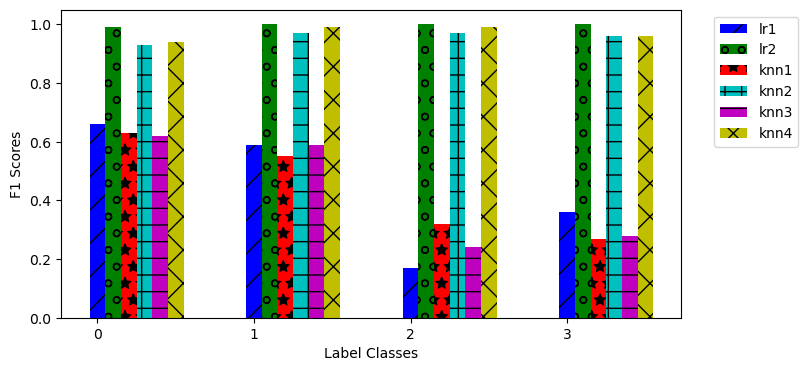

In [194]:
#Defining the x-axis labels
labels = ['0', '1', '2', '3']
#defining the color and pattern for each model's bars
colors = ['b', 'g', 'r', 'c', 'm', 'y']
patterns = ['/', 'o', '*', '+', '-', 'x']
#creating the plot
fig, ax = plt.subplots(figsize=(8, 4))
for i, (model, scores) in enumerate(f1_scores.items()):
    ax.bar([j+i*0.1 for j in range(len(scores))], scores, width=0.1, color=colors[i%len(colors)], hatch=patterns[i%len(patterns)], label=model)
#Setting x-tick labels
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
#adding the x-axis and y-axis labels
ax.set_xlabel('Label Classes')
ax.set_ylabel('F1 Scores')
#Moving legend outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

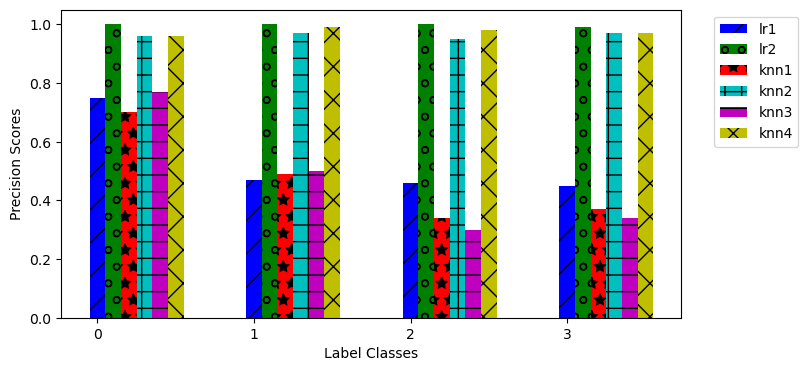

In [195]:
#Defining the x-axis labels
labels = ['0', '1', '2', '3']
#defining the color and pattern for each model's bars
colors = ['b', 'g', 'r', 'c', 'm', 'y']
patterns = ['/', 'o', '*', '+', '-', 'x']
#creating the plot
fig, ax = plt.subplots(figsize=(8, 4))
for i, (model, scores) in enumerate(precisions.items()):
    ax.bar([j+i*0.1 for j in range(len(scores))], scores, width=0.1, color=colors[i%len(colors)], hatch=patterns[i%len(patterns)], label=model)
#Setting x-tick labels
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
#adding the x-axis and y-axis labels
ax.set_xlabel('Label Classes')
ax.set_ylabel('Precision Scores')
#Moving legend outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

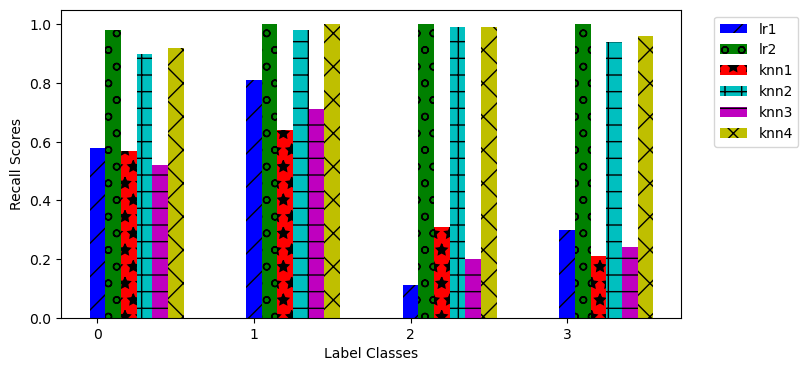

In [196]:
#Defining the x-axis labels
labels = ['0', '1', '2', '3']
#defining the color and pattern for each model's bars
colors = ['b', 'g', 'r', 'c', 'm', 'y']
patterns = ['/', 'o', '*', '+', '-', 'x']
#creating the plot
fig, ax = plt.subplots(figsize=(8, 4))
for i, (model, scores) in enumerate(recalls.items()):
    ax.bar([j+i*0.1 for j in range(len(scores))], scores, width=0.1, color=colors[i%len(colors)], hatch=patterns[i%len(patterns)], label=model)
#Setting x-tick labels
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
#adding the x-axis and y-axis labels
ax.set_xlabel('Label Classes')
ax.set_ylabel('Recall Scores')
#Moving legend outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

### Analysis of all models scores

* It can be seen by looking at all the models and their respecitve accuracy, F1-Score, Precision, and Recall that the best model is the Logistic Regression Model 2 which was created using the label target generated through heirarchical clustering earlier,
* KNN Models are slightly less accurate than Logistic Regression models even after optimally setting their K values,
* Heirarchical clustering is a useful method to find a label. target column for your dataset. Rather making a manual column as we did earlier called salary_label, we should stick to ML meathods to generate lable columns as they will produce a better result. 

### THE END